In [1]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score, roc_curve
)

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# For Apriori
from mlxtend.frequent_patterns import apriori, association_rules

# For saving models
import pickle
from datetime import datetime

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)

# Set visualization style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")


In [2]:
info = pd.read_csv('archive[1]/studentInfo.csv')
reg = pd.read_csv('archive[1]/studentRegistration.csv')
assess = pd.read_csv('archive[1]/studentAssessment.csv')
vle = pd.read_csv('archive[1]/studentVle.csv')
print(f"""
DATASET SUMMARY:
   • studentInfo: {info.shape[0]:,} rows, {info.shape[1]} columns
   • studentRegistration: {reg.shape[0]:,} rows, {reg.shape[1]} columns
   • studentAssessment: {assess.shape[0]:,} rows, {assess.shape[1]} columns
   • studentVle: {vle.shape[0]:,} rows, {vle.shape[1]} columns
   
   Total data points: {info.shape[0] + reg.shape[0] + assess.shape[0] + vle.shape[0]:,} rows
    """)


DATASET SUMMARY:
   • studentInfo: 32,593 rows, 12 columns
   • studentRegistration: 32,593 rows, 5 columns
   • studentAssessment: 173,912 rows, 5 columns
   • studentVle: 10,655,280 rows, 6 columns
   
   Total data points: 10,894,378 rows
    


In [4]:


print("DATASET OVERVIEW")


# studentInfo
print("\n 1. STUDENT INFO (Demographics)")
print(f"Shape: {info.shape}")
print(f"Columns: {info.columns.tolist()}")
print("\nFirst few rows:")
display(info.head())
print("\nData types:")
print(info.dtypes)
print("\nMissing values:")
print(info.isnull().sum())
print("\nTarget variable distribution:")
if 'final_result' in info.columns:
    print(info['final_result'].value_counts())
    print("\nPercentages:")
    print(info['final_result'].value_counts(normalize=True) * 100)


print("2. STUDENT REGISTRATION (Enrollment Dates)")
print(f"Shape: {reg.shape}")
print(f"Columns: {reg.columns.tolist()}")
print("\nFirst few rows:")
display(reg.head())
print("\nMissing values:")
print(reg.isnull().sum())

# studentAssessment

print("3. STUDENT ASSESSMENT (Grades)")
print(f"Shape: {assess.shape}")
print(f"Columns: {assess.columns.tolist()}")
print("\nFirst few rows:")
display(assess.head())
print("\nMissing values:")
print(assess.isnull().sum())
print("\nScore statistics:")
if 'score' in assess.columns:
    print(assess['score'].describe())

# studentVle

print(" 4. STUDENT VLE (Clickstream Data)")
print(f"Shape: {vle.shape}")
print(f"Columns: {vle.columns.tolist()}")
print("\nFirst few rows:")
display(vle.head())
print("\nMissing values:")
print(vle.isnull().sum())

print(" Data exploration complete!")


DATASET OVERVIEW

 1. STUDENT INFO (Demographics)
Shape: (32593, 12)
Columns: ['code_module', 'code_presentation', 'id_student', 'gender', 'region', 'highest_education', 'imd_band', 'age_band', 'num_of_prev_attempts', 'studied_credits', 'disability', 'final_result']

First few rows:


,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass



Data types:
code_module             object
code_presentation       object
id_student               int64
gender                  object
region                  object
highest_education       object
imd_band                object
age_band                object
num_of_prev_attempts     int64
studied_credits          int64
disability              object
final_result            object
dtype: object

Missing values:
code_module                0
code_presentation          0
id_student                 0
gender                     0
region                     0
highest_education          0
imd_band                1111
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
dtype: int64

Target variable distribution:
final_result
Pass           12361
Withdrawn      10156
Fail            7052
Distinction     3024
Name: count, dtype: int64

Percentages:
final_result
Pass           37.925321
Withdrawn      31

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN



Missing values:
code_module                0
code_presentation          0
id_student                 0
date_registration         45
date_unregistration    22521
dtype: int64
3. STUDENT ASSESSMENT (Grades)
Shape: (173912, 5)
Columns: ['id_assessment', 'id_student', 'date_submitted', 'is_banked', 'score']

First few rows:


,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0



Missing values:
id_assessment       0
id_student          0
date_submitted      0
is_banked           0
score             173
dtype: int64

Score statistics:
count    173739.000000
mean         75.799573
std          18.798107
min           0.000000
25%          65.000000
50%          80.000000
75%          90.000000
max         100.000000
Name: score, dtype: float64
 4. STUDENT VLE (Clickstream Data)
Shape: (10655280, 6)
Columns: ['code_module', 'code_presentation', 'id_student', 'id_site', 'date', 'sum_click']

First few rows:


,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1



Missing values:
code_module          0
code_presentation    0
id_student           0
id_site              0
date                 0
sum_click            0
dtype: int64
 Data exploration complete!


In [5]:


# Remove duplicates
before = info.shape[0]
info = info.drop_duplicates()
after = info.shape[0]
print(f"   - Removed {before - after} duplicate rows")

# Handle missing values in categorical columns
categorical_cols = ['gender', 'region', 'age_band', 'highest_education', 'disability']
for col in categorical_cols:
    if col in info.columns:
        missing = info[col].isnull().sum()
        if missing > 0:
            print(f"   - Filling {missing} missing values in '{col}' with 'Unknown'")
            info[col] = info[col].fillna('Unknown')

# Normalize text (lowercase and strip spaces)
text_cols = info.select_dtypes(include='object').columns
for col in text_cols:
    if col not in ['code_module', 'code_presentation', 'final_result']:
        info[col] = info[col].astype(str).str.strip().str.lower()

# Encode gender
if 'gender' in info.columns:
    info['gender_val'] = info['gender'].map({
        'm': 0, 'male': 0,
        'f': 1, 'female': 1,
        'unknown': 2
    }).fillna(2).astype(int)
    print(f"   - Created 'gender_val' column")

# Remove duplicates
before = reg.shape[0]
reg = reg.drop_duplicates()
after = reg.shape[0]
print(f"   - Removed {before - after} duplicate rows")

# Convert dates to numeric
if 'date_registration' in reg.columns:
    reg['date_registration'] = pd.to_numeric(reg['date_registration'], errors='coerce').fillna(0)
    print("   - Converted date_registration to numeric")

if 'date_unregistration' in reg.columns:
    reg['date_unregistration'] = pd.to_numeric(reg['date_unregistration'], errors='coerce')
    print("   - Converted date_unregistration to numeric")


# Remove duplicates
before = assess.shape[0]
assess = assess.drop_duplicates()
after = assess.shape[0]
print(f"   - Removed {before - after} duplicate rows")

# Convert score to numeric and handle missing
if 'score' in assess.columns:
    assess['score'] = pd.to_numeric(assess['score'], errors='coerce').fillna(0)
    print("   - Converted scores to numeric (missing → 0)")

# Convert date_submitted to numeric
if 'date_submitted' in assess.columns:
    assess['date_submitted'] = pd.to_numeric(assess['date_submitted'], errors='coerce').fillna(0)
    print("   - Converted date_submitted to numeric")


# Remove duplicates
before = vle.shape[0]
vle = vle.drop_duplicates()
after = vle.shape[0]
print(f"   - Removed {before - after} duplicate rows")

# Ensure numeric columns
if 'sum_click' in vle.columns:
    vle['sum_click'] = pd.to_numeric(vle['sum_click'], errors='coerce').fillna(0)
    print("   - Converted sum_click to numeric")

if 'date' in vle.columns:
    vle['date'] = pd.to_numeric(vle['date'], errors='coerce').fillna(0)
    print("   - Converted date to numeric")

print(f"\nCleaned shapes:")
print(f"   studentInfo: {info.shape}")
print(f"   studentRegistration: {reg.shape}")
print(f"   studentAssessment: {assess.shape}")
print(f"   studentVle: {vle.shape}")

   - Removed 0 duplicate rows
   - Created 'gender_val' column
   - Removed 0 duplicate rows
   - Converted date_registration to numeric
   - Converted date_unregistration to numeric
   - Removed 0 duplicate rows
   - Converted scores to numeric (missing → 0)
   - Converted date_submitted to numeric
   - Removed 787170 duplicate rows
   - Converted sum_click to numeric
   - Converted date to numeric

Cleaned shapes:
   studentInfo: (32593, 13)
   studentRegistration: (32593, 5)
   studentAssessment: (173912, 5)
   studentVle: (9868110, 6)


In [7]:



assess_features = assess.groupby('id_student').agg(
    avg_score=('score', 'mean'),
    max_score=('score', 'max'),
    min_score=('score', 'min'),
    submission_count=('id_assessment', 'count'),
    total_score=('score', 'sum')
).reset_index()

# Calculate late submissions if date info exists
if 'date_submitted' in assess.columns:
    assess_features['avg_days_to_submit'] = assess.groupby('id_student')['date_submitted'].mean().values

print(f"   Created {len(assess_features.columns)-1} assessment features")
print(f"   Features: {assess_features.columns.tolist()[1:]}")



vle_features = vle.groupby('id_student').agg(
    total_clicks=('sum_click', 'sum'),
    days_active=('date', 'nunique'),
    avg_clicks_per_day=('sum_click', 'mean'),
    max_clicks_single_day=('sum_click', 'max'),
    activity_sessions=('date', 'count')
).reset_index()

# Calculate engagement consistency
vle_features['click_consistency'] = vle_features['total_clicks'] / (vle_features['days_active'] + 1)

print(f"   Created {len(vle_features.columns)-1} VLE features")
print(f"   Features: {vle_features.columns.tolist()[1:]}")


# Calculate days active in course
if 'date_registration' in reg.columns and 'date_unregistration' in reg.columns:
    max_course_duration = 365
    reg['days_enrolled'] = np.where(
        reg['date_unregistration'].isna(),
        max_course_duration - reg['date_registration'],
        reg['date_unregistration'] - reg['date_registration']
    )
    reg['days_enrolled'] = reg['days_enrolled'].clip(lower=0)
    print("   Created 'days_enrolled' feature")

# Early vs late registration
if 'date_registration' in reg.columns:
    reg['early_registration'] = (reg['date_registration'] < reg['date_registration'].median()).astype(int)
    print("    Created 'early_registration' feature")


# Display sample features
print("\n Sample Assessment Features:")
display(assess_features.head())
print("\n Sample VLE Features:")
display(vle_features.head())

   Created 6 assessment features
   Features: ['avg_score', 'max_score', 'min_score', 'submission_count', 'total_score', 'avg_days_to_submit']
   Created 6 VLE features
   Features: ['total_clicks', 'days_active', 'avg_clicks_per_day', 'max_clicks_single_day', 'activity_sessions', 'click_consistency']
   Created 'days_enrolled' feature
    Created 'early_registration' feature

 Sample Assessment Features:


,id_student,avg_score,max_score,min_score,submission_count,total_score,avg_days_to_submit
0,6516,61.800000,77.0,48.0,5,309.0,111.600000
1,8462,87.000000,93.0,83.0,7,609.0,23.000000
2,11391,82.000000,85.0,78.0,5,410.0,112.400000
3,23629,82.500000,100.0,63.0,4,330.0,55.750000
4,23698,74.444444,94.0,56.0,9,670.0,133.444444



 Sample VLE Features:


,id_student,total_clicks,days_active,avg_clicks_per_day,max_clicks_single_day,activity_sessions,click_consistency
0,6516,2715,159,4.344000,49,625,16.968750
1,8462,643,56,2.172297,16,296,11.280702
2,11391,922,40,4.802083,76,192,22.487805
3,23629,153,16,3.000000,13,51,9.000000
4,23698,886,70,3.097902,78,286,12.478873


In [8]:

print("\n[ Merging studentInfo + studentRegistration...")
merge_keys = ['id_student', 'code_module', 'code_presentation']

master_df = pd.merge(
    info,
    reg,
    on=merge_keys,
    how='inner'
)
print(f"   After base merge: {master_df.shape}")

# Add assessment features (LEFT JOIN - some students may have no assessments)
print("\n Adding assessment features...")
master_df = pd.merge(
    master_df,
    assess_features,
    on='id_student',
    how='left'
)
print(f"  After assessment merge: {master_df.shape}")

# Add VLE features 
print("\n Adding VLE features...")
master_df = pd.merge(
    master_df,
    vle_features,
    on='id_student',
    how='left'
)
print(f"   After VLE merge: {master_df.shape}")

# Fill NaN values for students with no activity
feature_cols = [
    'avg_score', 'max_score', 'min_score', 'submission_count', 'total_score',
    'total_clicks', 'days_active', 'avg_clicks_per_day', 'max_clicks_single_day',
    'activity_sessions', 'click_consistency'
]

existing_feature_cols = [col for col in feature_cols if col in master_df.columns]
master_df[existing_feature_cols] = master_df[existing_feature_cols].fillna(0)

print(f"\nFinal shape: {master_df.shape}")
print(f"Total columns: {len(master_df.columns)}")
print(f"\nColumn names:")
print(master_df.columns.tolist())

print("\n Master Dataset Preview:")
display(master_df.head())

print("\n Data Types:")
print(master_df.dtypes)

print("\n Missing Values:")
print(master_df.isnull().sum())

print("\n Target Variable Distribution:")
if 'final_result' in master_df.columns:
    print(master_df['final_result'].value_counts())
    print("\nPercentages:")
    print(master_df['final_result'].value_counts(normalize=True) * 100)


[ Merging studentInfo + studentRegistration...
   After base merge: (32593, 17)

 Adding assessment features...
  After assessment merge: (32593, 23)

 Adding VLE features...
   After VLE merge: (32593, 29)

Final shape: (32593, 29)
Total columns: 29

Column names:
['code_module', 'code_presentation', 'id_student', 'gender', 'region', 'highest_education', 'imd_band', 'age_band', 'num_of_prev_attempts', 'studied_credits', 'disability', 'final_result', 'gender_val', 'date_registration', 'date_unregistration', 'days_enrolled', 'early_registration', 'avg_score', 'max_score', 'min_score', 'submission_count', 'total_score', 'avg_days_to_submit', 'total_clicks', 'days_active', 'avg_clicks_per_day', 'max_clicks_single_day', 'activity_sessions', 'click_consistency']

 Master Dataset Preview:


,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,gender_val,date_registration,date_unregistration,days_enrolled,early_registration,avg_score,max_score,min_score,submission_count,total_score,avg_days_to_submit,total_clicks,days_active,avg_clicks_per_day,max_clicks_single_day,activity_sessions,click_consistency
0,AAA,2013J,11391,m,east anglian region,he qualification,90-100%,55<=,0,240,n,Pass,0,-159.0,NaN,524.0,1,82.0,85.0,78.0,5.0,410.0,112.4,922.0,40.0,4.802083,76.0,192.0,22.487805
1,AAA,2013J,28400,f,scotland,he qualification,20-30%,35-55,0,60,n,Pass,1,-53.0,NaN,418.0,0,66.4,70.0,60.0,5.0,332.0,114.2,1409.0,80.0,3.403382,23.0,414.0,17.395062
2,AAA,2013J,30268,f,north western region,a level or equivalent,30-40%,35-55,0,60,y,Withdrawn,1,-92.0,12.0,104.0,1,0.0,0.0,0.0,0.0,0.0,NaN,260.0,12.0,3.611111,23.0,72.0,20.000000
3,AAA,2013J,31604,f,south east region,a level or equivalent,50-60%,35-55,0,60,n,Pass,1,-52.0,NaN,417.0,0,76.0,88.0,71.0,5.0,380.0,112.2,2007.0,123.0,3.306425,22.0,607.0,16.185484
4,AAA,2013J,32885,f,west midlands region,lower than a level,50-60%,0-35,0,60,n,Pass,1,-176.0,NaN,541.0,1,54.4,75.0,30.0,5.0,272.0,125.6,1012.0,70.0,3.020896,22.0,335.0,14.253521



 Data Types:
code_module               object
code_presentation         object
id_student                 int64
gender                    object
region                    object
highest_education         object
imd_band                  object
age_band                  object
num_of_prev_attempts       int64
studied_credits            int64
disability                object
final_result              object
gender_val                 int64
date_registration        float64
date_unregistration      float64
days_enrolled            float64
early_registration         int64
avg_score                float64
max_score                float64
min_score                float64
submission_count         float64
total_score              float64
avg_days_to_submit       float64
total_clicks             float64
days_active              float64
avg_clicks_per_day       float64
max_clicks_single_day    float64
activity_sessions        float64
click_consistency        float64
dtype: object

 Missing Value

In [11]:


# Create binary tags for Apriori
print("\n Creating binary tags for pattern mining...")

apriori_df = pd.DataFrame()

# Target outcomes
apriori_df['Result_Fail'] = master_df['final_result'].isin(['Fail', 'Withdrawn'])
apriori_df['Result_Pass'] = master_df['final_result'].isin(['Pass', 'Distinction'])
apriori_df['Result_Distinction'] = master_df['final_result'] == 'Distinction'

# Activity levels
if 'total_clicks' in master_df.columns:
    q25 = master_df['total_clicks'].quantile(0.25)
    q75 = master_df['total_clicks'].quantile(0.75)
    apriori_df['Low_Activity'] = master_df['total_clicks'] < q25
    apriori_df['High_Activity'] = master_df['total_clicks'] > q75
    apriori_df['No_Activity'] = master_df['total_clicks'] == 0

# Performance levels
if 'avg_score' in master_df.columns:
    apriori_df['Low_Scores'] = master_df['avg_score'] < 50
    apriori_df['High_Scores'] = master_df['avg_score'] > 75
    apriori_df['No_Submissions'] = master_df['avg_score'] == 0

# Engagement patterns
if 'days_active' in master_df.columns:
    apriori_df['Rarely_Active'] = master_df['days_active'] < master_df['days_active'].quantile(0.25)
    apriori_df['Very_Active'] = master_df['days_active'] > master_df['days_active'].quantile(0.75)

# Registration timing
if 'date_registration' in master_df.columns:
    apriori_df['Late_Registration'] = master_df['date_registration'] < -50

# Demographics
if 'disability' in master_df.columns:
    apriori_df['Has_Disability'] = master_df['disability'].isin(['Y', 'y', 'yes'])

print(f"    Created {len(apriori_df.columns)} binary tags")
print(f"   Tags: {apriori_df.columns.tolist()}")

# Run Apriori algorithm
print("\n[2/3] Running Apriori algorithm...")
print("   (This may take a minute...)")

try:
    # Find frequent itemsets
    frequent_itemsets = apriori(apriori_df, min_support=0.05, use_colnames=True)
    print(f"    Found {len(frequent_itemsets)} frequent itemsets")
    
    # Generate association rules
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
    print(f"   Generated {len(rules)} association rules")
    
    # Filter and display interesting rules
    print("\n[3/3] Analyzing patterns...")
    
    # Rules leading to FAIL
    fail_rules = rules[rules['consequents'].apply(lambda x: 'Result_Fail' in x)]
    if len(fail_rules) > 0:
        fail_rules_sorted = fail_rules.sort_values('lift', ascending=False).head(10)
        for idx, row in fail_rules_sorted.iterrows():
            antecedents = ', '.join(list(row['antecedents']))
            print(f"\n   IF: {antecedents}")
            print(f"   THEN: Likely to FAIL")
            print(f"   Support: {row['support']:.3f} | Confidence: {row['confidence']:.3f} | Lift: {row['lift']:.3f}")
    else:
        print("   No strong failure patterns found")
    
    # Rules leading to SUCCESS
    pass_rules = rules[rules['consequents'].apply(lambda x: 'Result_Pass' in x or 'Result_Distinction' in x)]
    if len(pass_rules) > 0:
        pass_rules_sorted = pass_rules.sort_values('lift', ascending=False).head(10)
        for idx, row in pass_rules_sorted.iterrows():
            antecedents = ', '.join(list(row['antecedents']))
            print(f"\n   IF: {antecedents}")
            print(f"   THEN: Likely to PASS/DISTINCTION")
            print(f"   Support: {row['support']:.3f} | Confidence: {row['confidence']:.3f} | Lift: {row['lift']:.3f}")
    else:
        print("   No strong success patterns found")
    
    # Save results
    rules.to_csv('Pattern_Mining_Results.csv', index=False)
    print("\n Saved: Pattern_Mining_Results.csv")
    
except Exception as e:
    print(f"Warning: Apriori mining encountered an issue: {e}")
    print("   Continuing without pattern mining results...")
    rules = pd.DataFrame()




 Creating binary tags for pattern mining...
    Created 13 binary tags
   Tags: ['Result_Fail', 'Result_Pass', 'Result_Distinction', 'Low_Activity', 'High_Activity', 'No_Activity', 'Low_Scores', 'High_Scores', 'No_Submissions', 'Rarely_Active', 'Very_Active', 'Late_Registration', 'Has_Disability']

[2/3] Running Apriori algorithm...
   (This may take a minute...)
    Found 170 frequent itemsets
   Generated 2148 association rules

[3/3] Analyzing patterns...

   IF: Rarely_Active, Low_Activity, No_Submissions, Late_Registration
   THEN: Likely to FAIL
   Support: 0.063 | Confidence: 0.597 | Lift: 6.878

   IF: No_Activity, Low_Scores
   THEN: Likely to FAIL
   Support: 0.063 | Confidence: 0.722 | Lift: 6.875

   IF: Rarely_Active, Low_Activity, No_Submissions, Late_Registration
   THEN: Likely to FAIL
   Support: 0.063 | Confidence: 0.597 | Lift: 6.832

   IF: Low_Activity, No_Submissions, Late_Registration, Rarely_Active, Low_Scores
   THEN: Likely to FAIL
   Support: 0.063 | Confide

In [14]:

# Define feature columns
potential_features = [
    'gender_val',
    'avg_score',
    'max_score',
    'min_score',
    'submission_count',
    'total_clicks',
    'days_active',
    'avg_clicks_per_day',
    'max_clicks_single_day',
    'activity_sessions',
    'click_consistency',
    'date_registration',
    'days_enrolled',
    'early_registration'
]

# Check which features actually exist in the dataset
available_features = [col for col in potential_features if col in master_df.columns]

print(f"\n Available features ({len(available_features)}):")
for feat in available_features:
    print(f"   - {feat}")

# Create target variable (y) FIRST
print("\n Creating target variable...")

if 'final_result' in master_df.columns:
    # Map to binary: Pass/Distinction = 1, Fail/Withdrawn = 0
    target_mapping = {
        'Pass': 1,
        'Distinction': 1,
        'pass': 1,
        'distinction': 1,
        'Fail': 0,
        'Withdrawn': 0,
        'fail': 0,
        'withdrawn': 0
    }
    
    # Create temporary target column
    master_df['target'] = master_df['final_result'].map(target_mapping)
    
    # Check for unmapped values
    if master_df['target'].isnull().sum() > 0:
        print(f"\n Warning: {master_df['target'].isnull().sum()} rows with unmapped target values")
        print(f"   Unique values found: {master_df['final_result'].unique()}")
        print("   Dropping rows with unmapped targets...")
        
        # Drop rows with null targets
        master_df = master_df[master_df['target'].notna()].copy()
        print(f"    Dropped rows. Remaining: {len(master_df)}")
    
    # Now create X and y from the cleaned dataframe
    X = master_df[available_features].copy()
    y = master_df['target'].copy()
    
    # Handle any remaining missing values in features
    X = X.fillna(0)
    
    print(f"\n Feature matrix shape: {X.shape}")
    print(f"\n Target variable created")
    print(f"   Shape: {y.shape}")
    print(f"   Class distribution:")
    print(f"      Fail/Withdrawn (0): {(y == 0).sum()} ({(y == 0).sum()/len(y)*100:.1f}%)")
    print(f"      Pass/Distinction (1): {(y == 1).sum()} ({(y == 1).sum()/len(y)*100:.1f}%)")
else:
    raise ValueError("'final_result' column not found in dataset!")

# Train-test split
print("\n Splitting data into train/test sets...")

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # Maintain class balance
)

print(f"    Training set: {X_train.shape[0]} samples")
print(f"    Test set: {X_test.shape[0]} samples")

# Feature scaling
print("\n Scaling features...")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("    Features scaled (for models that need it)")


# Summary
print(f"""
SUMMARY:
   • Total samples: {len(X)}
   • Features: {len(available_features)}
   • Training samples: {len(X_train)}
   • Test samples: {len(X_test)}
   • Class balance: {(y_train == 1).sum()} success / {(y_train == 0).sum()} failure
""")

# Save the master dataset (with target column)
master_df.to_csv('Final_Student_Analysis.csv', index=False)
print(" Saved: Final_Student_Analysis.csv")


 Available features (14):
   - gender_val
   - avg_score
   - max_score
   - min_score
   - submission_count
   - total_clicks
   - days_active
   - avg_clicks_per_day
   - max_clicks_single_day
   - activity_sessions
   - click_consistency
   - date_registration
   - days_enrolled
   - early_registration

 Creating target variable...

 Feature matrix shape: (32593, 14)

 Target variable created
   Shape: (32593,)
   Class distribution:
      Fail/Withdrawn (0): 17208 (52.8%)
      Pass/Distinction (1): 15385 (47.2%)

 Splitting data into train/test sets...
    Training set: 26074 samples
    Test set: 6519 samples

 Scaling features...
    Features scaled (for models that need it)

SUMMARY:
   • Total samples: 32593
   • Features: 14
   • Training samples: 26074
   • Test samples: 6519
   • Class balance: 12308 success / 13766 failure

 Saved: Final_Student_Analysis.csv


In [15]:


# Load the detailed clickstream data
print("\n Loading clickstream data...")
vle_detailed = pd.read_csv('archive[1]/studentVle.csv')
print(f"    Loaded {len(vle_detailed):,} click events")

# Calculate daily clicks per student
print("\n[2/6] Analyzing daily study patterns...")
daily_activity = vle_detailed.groupby(['id_student', 'date'])['sum_click'].sum().reset_index()
daily_activity.columns = ['id_student', 'date', 'daily_clicks']

# Calculate statistics per student
student_patterns = daily_activity.groupby('id_student').agg(
    avg_daily_clicks=('daily_clicks', 'mean'),
    max_daily_clicks=('daily_clicks', 'max'),
    std_daily_clicks=('daily_clicks', 'std'),
    total_active_days=('date', 'count')
).reset_index()

# Fill NaN std with 0 (students with only 1 active day)
student_patterns['std_daily_clicks'] = student_patterns['std_daily_clicks'].fillna(0)

print(f"   Analyzed {len(student_patterns):,} students")

# Define "binge learner" criteria
print("\n Classifying learning styles...")

# Calculate coefficient of variation (CV) = std / mean
# High CV = inconsistent (binge), Low CV = consistent (steady)
student_patterns['cv_clicks'] = student_patterns['std_daily_clicks'] / (student_patterns['avg_daily_clicks'] + 1)

# Calculate "binge ratio" = max day / average day
student_patterns['binge_ratio'] = student_patterns['max_daily_clicks'] / (student_patterns['avg_daily_clicks'] + 1)


student_patterns['learning_style'] = 'Moderate'
student_patterns.loc[
    (student_patterns['cv_clicks'] > 1.5) | (student_patterns['binge_ratio'] > 3),
    'learning_style'
] = 'Binge Learner'
student_patterns.loc[
    (student_patterns['cv_clicks'] < 0.8) & (student_patterns['binge_ratio'] < 2),
    'learning_style'
] = 'Steady Learner'

print("\n Learning Style Distribution:")
style_counts = student_patterns['learning_style'].value_counts()
print(style_counts)
print("\n Percentages:")
print((style_counts / len(student_patterns) * 100).round(2))

# Merge with outcomes
print("\n[4/6] Merging with performance data...")
student_outcomes = master_df[['id_student', 'final_result', 'avg_score', 'target']].copy()
student_patterns = student_patterns.merge(student_outcomes, on='id_student', how='left')

# Remove students without outcome data
student_patterns = student_patterns.dropna(subset=['final_result'])

print(f"   {len(student_patterns):,} students with complete data")

# Analyze performance by learning style
print("\n Comparing performance...")

performance_by_style = student_patterns.groupby('learning_style').agg(
    count=('id_student', 'count'),
    avg_score=('avg_score', 'mean'),
    pass_rate=('target', lambda x: (x == 1).sum() / len(x) * 100 if len(x) > 0 else 0),
    avg_active_days=('total_active_days', 'mean'),
    avg_max_clicks=('max_daily_clicks', 'mean')
).round(2)

print("\n Performance by Learning Style:")
print(performance_by_style.to_string())

# Statistical significance test
from scipy import stats

print("\n Statistical testing...")

binge_scores = student_patterns[student_patterns['learning_style'] == 'Binge Learner']['avg_score'].dropna()
steady_scores = student_patterns[student_patterns['learning_style'] == 'Steady Learner']['avg_score'].dropna()

if len(binge_scores) > 0 and len(steady_scores) > 0:
    t_stat, p_value = stats.ttest_ind(binge_scores, steady_scores)
    print(f"\n T-test Results:")
    print(f"   Binge avg: {binge_scores.mean():.2f}")
    print(f"   Steady avg: {steady_scores.mean():.2f}")
    print(f"   Difference: {abs(binge_scores.mean() - steady_scores.mean()):.2f} points")
    print(f"   T-statistic: {t_stat:.4f}")
    print(f"   P-value: {p_value:.4f}")
    
    if p_value < 0.05:
        print(f"   Statistically significant difference (p < 0.05)!")
        if steady_scores.mean() > binge_scores.mean():
            print(f"   VERDICT: Steady learning is significantly better!")
        else:
            print(f"   VERDICT: Binge learning performs significantly better!")
    else:
        print(f"    No significant difference (p >= 0.05)")
        print(f"    VERDICT: Both approaches yield similar results")

# Save results
student_patterns.to_csv('Binge_Learning_Analysis.csv', index=False)
print("\n Saved: Binge_Learning_Analysis.csv")



 Loading clickstream data...
    Loaded 10,655,280 click events

[2/6] Analyzing daily study patterns...
   Analyzed 26,074 students

 Classifying learning styles...

 Learning Style Distribution:
learning_style
Binge Learner     21081
Moderate           2985
Steady Learner     2008
Name: count, dtype: int64

 Percentages:
learning_style
Binge Learner     80.85
Moderate          11.45
Steady Learner     7.70
Name: count, dtype: float64

[4/6] Merging with performance data...
   29,741 students with complete data

 Comparing performance...

 Performance by Learning Style:
                count  avg_score  pass_rate  avg_active_days  avg_max_clicks
learning_style                                                              
Binge Learner   24409      71.92      60.40            82.36          156.93
Moderate         3190      46.92      17.77            16.02           43.32
Steady Learner   2142      17.44       3.36             4.09           17.47

 Statistical testing...

 T-test Re


 Creating performance comparison chart...
    Saved: binge_vs_steady_performance.png


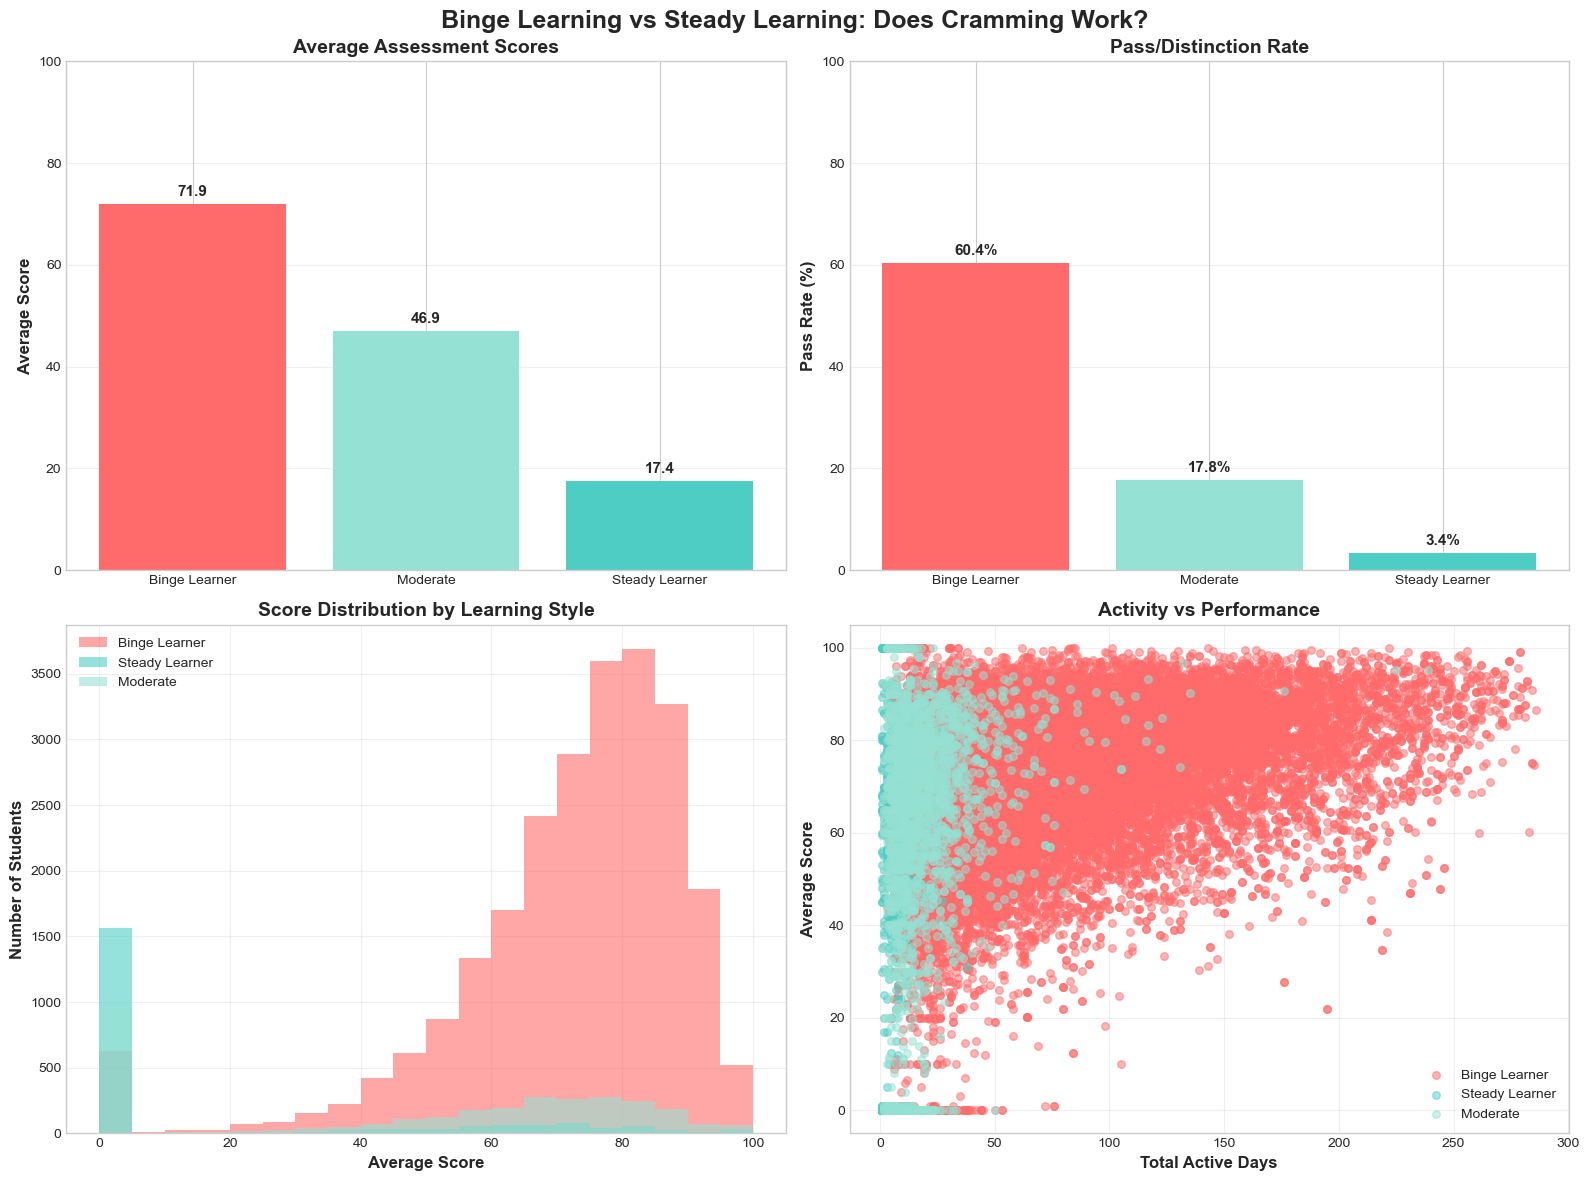


 Creating study pattern heatmaps...
    Saved: study_pattern_intensity.png


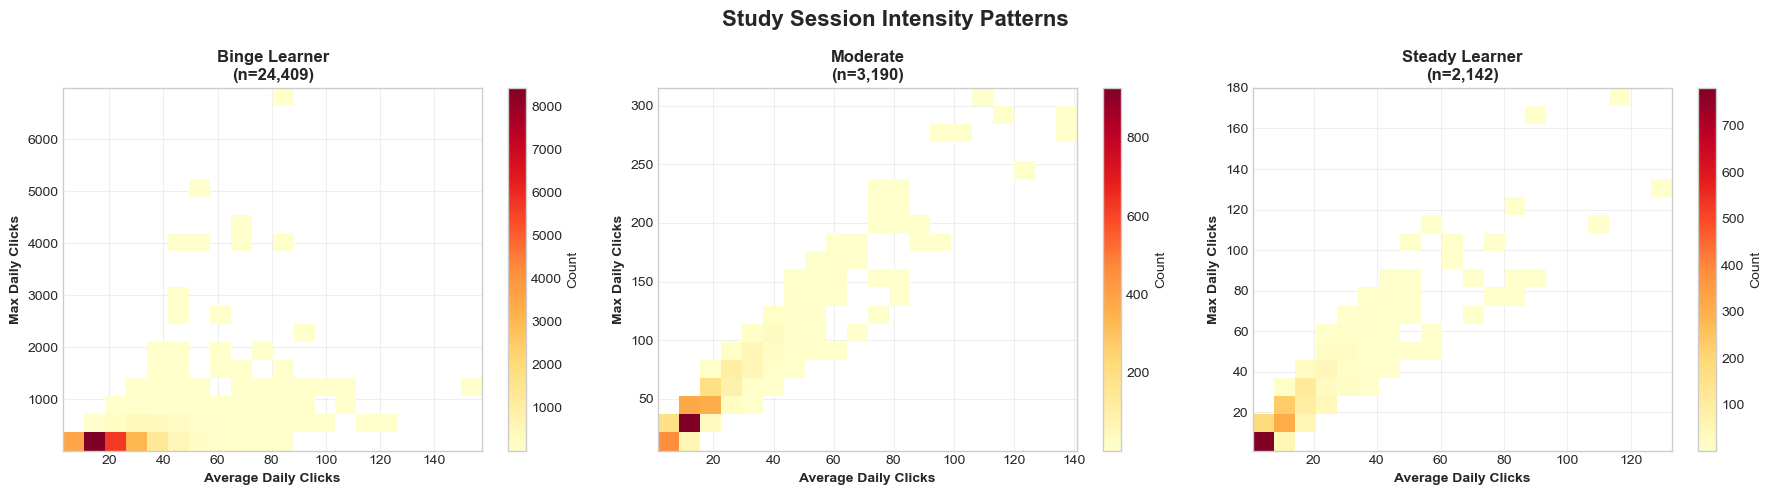


 Creating box plot comparisons...
    Saved: learning_style_distributions.png


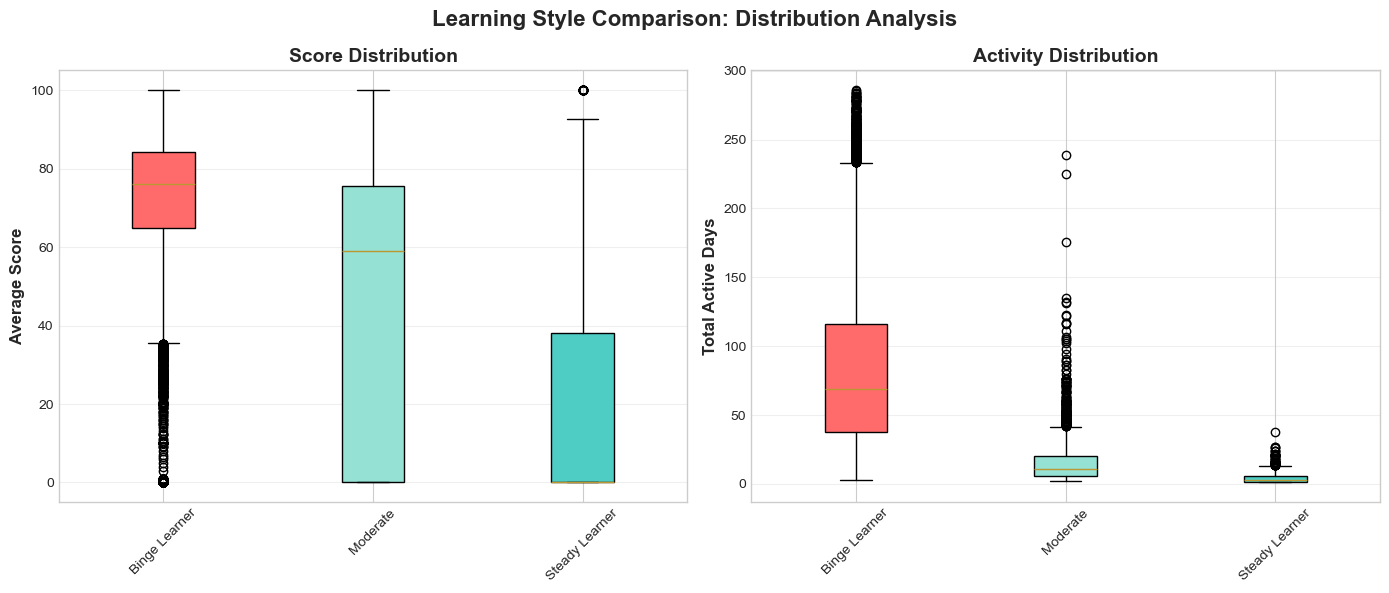


 1. PERFORMANCE COMPARISON:
   Binge Learners  (n=24,409):
      • Average Score: 71.92/100
      • Pass Rate: 60.4%
      • Active Days: 82.4

   Steady Learners (n=2,142):
      • Average Score: 17.44/100
      • Pass Rate: 3.4%
      • Active Days: 4.1

 2. THE DIFFERENCE:
   • Score difference: 54.49 points
   • Pass rate difference: 57.0 percentage points

 3. FINAL VERDICT:
    SURPRISING RESULT: BINGE LEARNING WINS!
   • Binge learners score 54.5 points higher
   • Binge learners have 57.0% higher pass rate
   • CONCLUSION: Cramming can be effective for some students!

 4. PRACTICAL INSIGHTS:
   • Binge learners study in 82 sessions
   • Steady learners study over 4 sessions
   • Peak binge session: 157 clicks
   • Peak steady session: 17 clicks


In [21]:

# Load the analysis results
student_patterns = pd.read_csv('Binge_Learning_Analysis.csv')

print("\n Creating performance comparison chart...")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Binge Learning vs Steady Learning: Does Cramming Work?', 
             fontsize=18, fontweight='bold')

# 1. Average Score by Learning Style
ax1 = axes[0, 0]
style_scores = student_patterns.groupby('learning_style')['avg_score'].mean().sort_values(ascending=False)
colors = {'Binge Learner': '#ff6b6b', 'Steady Learner': '#4ecdc4', 'Moderate': '#95e1d3'}
bar_colors = [colors.get(style, '#95e1d3') for style in style_scores.index]
bars = ax1.bar(range(len(style_scores)), style_scores.values, color=bar_colors)
ax1.set_xticks(range(len(style_scores)))
ax1.set_xticklabels(style_scores.index, rotation=0)
ax1.set_ylabel('Average Score', fontweight='bold', fontsize=12)
ax1.set_title('Average Assessment Scores', fontweight='bold', fontsize=14)
ax1.set_ylim([0, 100])
ax1.grid(axis='y', alpha=0.3)

# Add value labels
for i, (bar, val) in enumerate(zip(bars, style_scores.values)):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 1,
            f'{val:.1f}',
            ha='center', va='bottom', fontweight='bold', fontsize=11)

# 2. Pass Rate by Learning Style
ax2 = axes[0, 1]
pass_rates = student_patterns.groupby('learning_style')['target'].apply(
    lambda x: (x == 1).sum() / len(x) * 100 if len(x) > 0 else 0
).sort_values(ascending=False)
bar_colors = [colors.get(style, '#95e1d3') for style in pass_rates.index]
bars = ax2.bar(range(len(pass_rates)), pass_rates.values, color=bar_colors)
ax2.set_xticks(range(len(pass_rates)))
ax2.set_xticklabels(pass_rates.index, rotation=0)
ax2.set_ylabel('Pass Rate (%)', fontweight='bold', fontsize=12)
ax2.set_title('Pass/Distinction Rate', fontweight='bold', fontsize=14)
ax2.set_ylim([0, 100])
ax2.grid(axis='y', alpha=0.3)

for i, (bar, val) in enumerate(zip(bars, pass_rates.values)):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 1,
            f'{val:.1f}%',
            ha='center', va='bottom', fontweight='bold', fontsize=11)

# 3. Distribution of Scores (Histogram)
ax3 = axes[1, 0]
for style in ['Binge Learner', 'Steady Learner', 'Moderate']:
    if style in student_patterns['learning_style'].values:
        data = student_patterns[student_patterns['learning_style'] == style]['avg_score'].dropna()
        ax3.hist(data, alpha=0.6, label=style, bins=20, color=colors.get(style, '#95e1d3'))
ax3.set_xlabel('Average Score', fontweight='bold', fontsize=12)
ax3.set_ylabel('Number of Students', fontweight='bold', fontsize=12)
ax3.set_title('Score Distribution by Learning Style', fontweight='bold', fontsize=14)
ax3.legend(fontsize=10)
ax3.grid(alpha=0.3)

# 4. Active Days vs Score (Scatter plot)
ax4 = axes[1, 1]
for style in ['Binge Learner', 'Steady Learner', 'Moderate']:
    if style in student_patterns['learning_style'].values:
        data = student_patterns[student_patterns['learning_style'] == style]
        ax4.scatter(data['total_active_days'], data['avg_score'], 
                   alpha=0.5, label=style, color=colors.get(style, '#95e1d3'), s=30)
ax4.set_xlabel('Total Active Days', fontweight='bold', fontsize=12)
ax4.set_ylabel('Average Score', fontweight='bold', fontsize=12)
ax4.set_title('Activity vs Performance', fontweight='bold', fontsize=14)
ax4.legend(fontsize=10)
ax4.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('binge_vs_steady_performance.png', dpi=300, bbox_inches='tight')
print("    Saved: binge_vs_steady_performance.png")
plt.show()

print("\n Creating study pattern heatmaps...")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Study Session Intensity Patterns', fontsize=16, fontweight='bold')

styles = ['Binge Learner', 'Moderate', 'Steady Learner']
for idx, style in enumerate(styles):
    ax = axes[idx]
    data = student_patterns[student_patterns['learning_style'] == style]
    
    if len(data) > 0:
        # Create 2D histogram
        h = ax.hist2d(data['avg_daily_clicks'], data['max_daily_clicks'], 
                 bins=20, cmap='YlOrRd', cmin=1)
        ax.set_xlabel('Average Daily Clicks', fontweight='bold')
        ax.set_ylabel('Max Daily Clicks', fontweight='bold')
        ax.set_title(f'{style}\n(n={len(data):,})', fontweight='bold')
        ax.grid(alpha=0.3)
        plt.colorbar(h[3], ax=ax, label='Count')

plt.tight_layout()
plt.savefig('study_pattern_intensity.png', dpi=300, bbox_inches='tight')
print("    Saved: study_pattern_intensity.png")
plt.show()


print("\n Creating box plot comparisons...")

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Learning Style Comparison: Distribution Analysis', 
             fontsize=16, fontweight='bold')

# Score distribution
ax1 = axes[0]
data_to_plot = [student_patterns[student_patterns['learning_style'] == style]['avg_score'].dropna() 
                for style in ['Binge Learner', 'Moderate', 'Steady Learner']]
bp1 = ax1.boxplot(data_to_plot, tick_labels=['Binge Learner', 'Moderate', 'Steady Learner'],
                  patch_artist=True)
for patch, color in zip(bp1['boxes'], ['#ff6b6b', '#95e1d3', '#4ecdc4']):
    patch.set_facecolor(color)
ax1.set_ylabel('Average Score', fontweight='bold', fontsize=12)
ax1.set_title('Score Distribution', fontweight='bold', fontsize=14)
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', alpha=0.3)

# Active days distribution
ax2 = axes[1]
data_to_plot = [student_patterns[student_patterns['learning_style'] == style]['total_active_days'].dropna() 
                for style in ['Binge Learner', 'Moderate', 'Steady Learner']]
bp2 = ax2.boxplot(data_to_plot, tick_labels=['Binge Learner', 'Moderate', 'Steady Learner'],
                  patch_artist=True)
for patch, color in zip(bp2['boxes'], ['#ff6b6b', '#95e1d3', '#4ecdc4']):
    patch.set_facecolor(color)
ax2.set_ylabel('Total Active Days', fontweight='bold', fontsize=12)
ax2.set_title('Activity Distribution', fontweight='bold', fontsize=14)
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('learning_style_distributions.png', dpi=300, bbox_inches='tight')
print("    Saved: learning_style_distributions.png")
plt.show()



binge_data = student_patterns[student_patterns['learning_style'] == 'Binge Learner']
steady_data = student_patterns[student_patterns['learning_style'] == 'Steady Learner']

if len(binge_data) > 0 and len(steady_data) > 0:
    binge_avg = binge_data['avg_score'].mean()
    steady_avg = steady_data['avg_score'].mean()
    binge_pass = (binge_data['target']==1).sum()/len(binge_data)*100
    steady_pass = (steady_data['target']==1).sum()/len(steady_data)*100
    
    print(f"\n 1. PERFORMANCE COMPARISON:")
    print(f"   Binge Learners  (n={len(binge_data):,}):")
    print(f"      • Average Score: {binge_avg:.2f}/100")
    print(f"      • Pass Rate: {binge_pass:.1f}%")
    print(f"      • Active Days: {binge_data['total_active_days'].mean():.1f}")
    
    print(f"\n   Steady Learners (n={len(steady_data):,}):")
    print(f"      • Average Score: {steady_avg:.2f}/100")
    print(f"      • Pass Rate: {steady_pass:.1f}%")
    print(f"      • Active Days: {steady_data['total_active_days'].mean():.1f}")
    
    print(f"\n 2. THE DIFFERENCE:")
    score_diff = abs(steady_avg - binge_avg)
    pass_diff = abs(steady_pass - binge_pass)
    print(f"   • Score difference: {score_diff:.2f} points")
    print(f"   • Pass rate difference: {pass_diff:.1f} percentage points")
    
    print(f"\n 3. FINAL VERDICT:")
    if steady_avg > binge_avg + 2 and steady_pass > binge_pass:
        print("    STEADY LEARNING WINS!")
        print(f"   • Steady learners score {score_diff:.1f} points higher")
        print(f"   • Steady learners have {pass_diff:.1f}% higher pass rate")
        print("   • CONCLUSION: Cramming is NOT effective! Consistency wins.")
    elif binge_avg > steady_avg + 2 and binge_pass > steady_pass:
        print("    SURPRISING RESULT: BINGE LEARNING WINS!")
        print(f"   • Binge learners score {score_diff:.1f} points higher")
        print(f"   • Binge learners have {pass_diff:.1f}% higher pass rate")
        print("   • CONCLUSION: Cramming can be effective for some students!")
    else:
        print("    NO CLEAR WINNER - Both approaches work similarly")
        print(f"   • Difference is minimal ({score_diff:.1f} points)")
        print("   • CONCLUSION: Learning style matters less than total effort")
    
    print(f"\n 4. PRACTICAL INSIGHTS:")
    print(f"   • Binge learners study in {binge_data['total_active_days'].mean():.0f} sessions")
    print(f"   • Steady learners study over {steady_data['total_active_days'].mean():.0f} sessions")
    print(f"   • Peak binge session: {binge_data['max_daily_clicks'].mean():.0f} clicks")
    print(f"   • Peak steady session: {steady_data['max_daily_clicks'].mean():.0f} clicks")


In [22]:

print("\n Loading and preparing assessment data...")

# Load detailed assessment data
assess_detailed = pd.read_csv('archive[1]/studentAssessment.csv')
assess_metadata = pd.read_csv('archive[1]/assessments.csv')

# Merge to get assessment dates
assess_detailed = assess_detailed.merge(
    assess_metadata[['id_assessment', 'date']], 
    on='id_assessment', 
    how='left'
)

print(f"    Loaded {len(assess_detailed):,} assessment submissions")

# Calculate early vs late performance
print("\n Calculating temporal performance trends...")

# For each student, split their assessments into early/middle/late
student_trajectories = []

for student_id in assess_detailed['id_student'].unique():
    student_assessments = assess_detailed[assess_detailed['id_student'] == student_id].copy()
    
    if len(student_assessments) >= 3:  # Need at least 3 assessments
        # Sort by date
        student_assessments = student_assessments.sort_values('date')
        
        # Split into thirds
        n = len(student_assessments)
        early_third = student_assessments.iloc[:n//3]
        late_third = student_assessments.iloc[-(n//3):]
        
        # Calculate average scores
        early_score = early_third['score'].mean()
        late_score = late_third['score'].mean()
        
        # Calculate improvement
        improvement = late_score - early_score
        improvement_pct = (improvement / (early_score + 1)) * 100  # +1 to avoid div by zero
        
        student_trajectories.append({
            'id_student': student_id,
            'early_score': early_score,
            'late_score': late_score,
            'improvement': improvement,
            'improvement_pct': improvement_pct,
            'num_assessments': len(student_assessments)
        })

trajectory_df = pd.DataFrame(student_trajectories)
print(f"    Analyzed {len(trajectory_df):,} students with sufficient assessment data")
# Define "comeback" students
print("\n Identifying comeback stories...")

# Comeback criteria: Started low (early < 60) AND improved significantly (>20 points)
trajectory_df['comeback_status'] = 'Stable'

trajectory_df.loc[
    (trajectory_df['early_score'] < 60) & (trajectory_df['improvement'] > 20),
    'comeback_status'
] = 'Comeback Kid'

trajectory_df.loc[
    (trajectory_df['early_score'] > 70) & (trajectory_df['improvement'] < -20),
    'comeback_status'
] = 'Burnout'

trajectory_df.loc[
    (trajectory_df['early_score'] > 70) & (trajectory_df['late_score'] > 70),
    'comeback_status'
] = 'Consistent Star'

trajectory_df.loc[
    (trajectory_df['early_score'] < 60) & (trajectory_df['late_score'] < 60),
    'comeback_status'
] = 'Struggler'

print("\n Student Trajectory Types:")
print(trajectory_df['comeback_status'].value_counts())
print("\n Percentages:")
print((trajectory_df['comeback_status'].value_counts() / len(trajectory_df) * 100).round(2))

# Merge with final outcomes
print("\n Merging with outcomes...")
trajectory_df = trajectory_df.merge(
    master_df[['id_student', 'final_result', 'target', 'total_clicks', 'days_active']], 
    on='id_student', 
    how='left'
)

# Remove rows without outcome data
trajectory_df = trajectory_df.dropna(subset=['final_result'])

print(f"   {len(trajectory_df):,} students with complete trajectory data")

# Analyze outcomes by trajectory type
print("\nAnalyzing outcomes by trajectory type...")

outcome_by_trajectory = trajectory_df.groupby('comeback_status').agg(
    count=('id_student', 'count'),
    early_avg=('early_score', 'mean'),
    late_avg=('late_score', 'mean'),
    improvement_avg=('improvement', 'mean'),
    pass_rate=('target', lambda x: (x == 1).sum() / len(x) * 100 if len(x) > 0 else 0),
    avg_engagement=('total_clicks', 'mean')
).round(2)

print("\n Performance by Trajectory Type:")
print(outcome_by_trajectory.to_string())

# Highlight comeback success rate
print("\n Comeback success analysis...")

comeback_students = trajectory_df[trajectory_df['comeback_status'] == 'Comeback Kid']
if len(comeback_students) > 0:
    comeback_pass_rate = (comeback_students['target'] == 1).sum() / len(comeback_students) * 100
    print(f"\n COMEBACK KID SUCCESS RATE: {comeback_pass_rate:.1f}%")
    print(f"   • Total comeback students: {len(comeback_students)}")
    print(f"   • Average early score: {comeback_students['early_score'].mean():.2f}")
    print(f"   • Average late score: {comeback_students['late_score'].mean():.2f}")
    print(f"   • Average improvement: +{comeback_students['improvement'].mean():.2f} points")
    
    if comeback_pass_rate > 50:
        print(f"   Most comeback students succeed!")
    else:
        print(f"   Many comeback attempts still fail")

# Save results
trajectory_df.to_csv('Comeback_Analysis.csv', index=False)
print("\n Saved: Comeback_Analysis.csv")



 Loading and preparing assessment data...
    Loaded 173,912 assessment submissions

 Calculating temporal performance trends...
    Analyzed 19,956 students with sufficient assessment data

 Identifying comeback stories...

 Student Trajectory Types:
comeback_status
Consistent Star    9858
Stable             5454
Burnout            2288
Struggler          1237
Comeback Kid       1119
Name: count, dtype: int64

 Percentages:
comeback_status
Consistent Star    49.40
Stable             27.33
Burnout            11.47
Struggler           6.20
Comeback Kid        5.61
Name: count, dtype: float64

 Merging with outcomes...
   22,992 students with complete trajectory data

Analyzing outcomes by trajectory type...

 Performance by Trajectory Type:
                 count  early_avg  late_avg  improvement_avg  pass_rate  avg_engagement
comeback_status                                                                        
Burnout           2652      86.23     51.41           -34.82      57.99  


 Preparing features for prediction...
   Found 3,460 struggling students (early score < 60)

 Comeback Distribution:
   • Comeback Kids: 1376 (39.8%)
   • No Comeback: 2084 (60.2%)

 Creating predictive features...
    Using 4 features:
      • early_score
      • num_assessments
      • total_clicks
      • days_active

 Splitting data...
    Training set: 2595 students
    Test set: 865 students

 Training XGBoost model...
    XGBoost model trained!

 Making predictions...

 Evaluating model performance...

 MODEL PERFORMANCE:
   • Accuracy:  0.718 (71.8%)
   • Precision: 0.719 (71.9%)
   • Recall:    0.477 (47.7%)
   • F1-Score:  0.573

 Confusion Matrix:
[[457  64]
 [180 164]]

Interpretation:
   True Negatives:  457 (Correctly predicted NO comeback)
   False Positives: 64 (Predicted comeback, but didn't happen)
   False Negatives: 180 (Missed a comeback)
   True Positives:  164 (Correctly predicted comeback!)

 Analyzing feature importance...

 MOST IMPORTANT FACTORS FOR COMEBACK

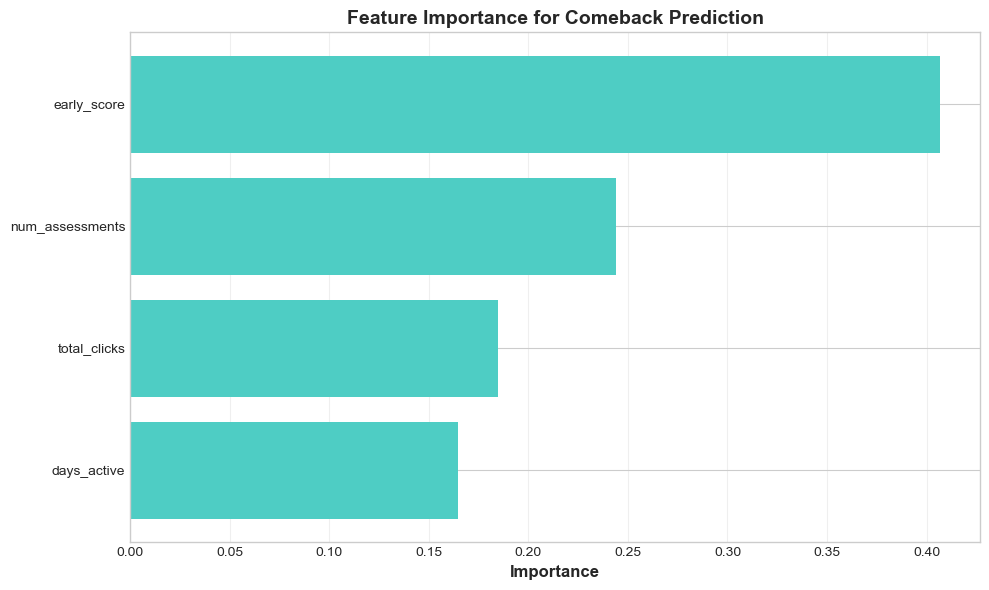


 Saved: Comeback_Predictions.csv

 MODEL INSIGHTS:
   • Accuracy: 71.8% - Model can predict comebacks with reasonable accuracy
   • Most important factor: early_score
     → This is the strongest predictor of comeback success
   • High precision (71.9%) - When it predicts comeback, it's usually right!

 INTERVENTION OPPORTUNITIES:
   • Found 101 students with HIGH comeback potential
     → These students should receive targeted support!


In [23]:


# Load the comeback analysis data
trajectory_df = pd.read_csv('Comeback_Analysis.csv')

print("\n Preparing features for prediction...")

# We want to predict: Will a student who starts weak have a comeback?
# Filter to only students who started weak (early_score < 60)
struggling_students = trajectory_df[trajectory_df['early_score'] < 60].copy()

print(f"   Found {len(struggling_students):,} struggling students (early score < 60)")

# Create binary target: Did they comeback? (1 = yes, 0 = no)
struggling_students['will_comeback'] = (struggling_students['comeback_status'] == 'Comeback Kid').astype(int)

print(f"\n Comeback Distribution:")
print(f"   • Comeback Kids: {struggling_students['will_comeback'].sum()} ({struggling_students['will_comeback'].sum()/len(struggling_students)*100:.1f}%)")
print(f"   • No Comeback: {(struggling_students['will_comeback']==0).sum()} ({(struggling_students['will_comeback']==0).sum()/len(struggling_students)*100:.1f}%)")

# Create features for prediction (using only early information)
print("\n Creating predictive features...")

# Features we can know early (before the comeback happens)
feature_columns = [
    'early_score',           # How low did they start?
    'num_assessments',       # How many assessments total?
    'total_clicks',          # Engagement level
    'days_active'            # Activity level
]

# Check which features exist
available_features = [col for col in feature_columns if col in struggling_students.columns]
print(f"    Using {len(available_features)} features:")
for feat in available_features:
    print(f"      • {feat}")

# Create feature matrix and target
X_comeback = struggling_students[available_features].fillna(0)
y_comeback = struggling_students['will_comeback']

# Check if we have enough data
if len(X_comeback) < 50:
    print("\n  Limited data for prediction")
    print(f"   Only {len(X_comeback)} struggling students found")
    print("   Predictions may be less reliable")

# Split into train/test
print("\n Splitting data...")

from sklearn.model_selection import train_test_split

X_train_cb, X_test_cb, y_train_cb, y_test_cb = train_test_split(
    X_comeback, y_comeback,
    test_size=0.25,
    random_state=42,
    stratify=y_comeback if y_comeback.value_counts().min() > 1 else None
)

print(f"    Training set: {len(X_train_cb)} students")
print(f"    Test set: {len(X_test_cb)} students")

# Train XGBoost model
print("\n Training XGBoost model...")

from xgboost import XGBClassifier

# Initialize XGBoost
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    random_state=42,
    eval_metric='logloss'
)

# Train the model
xgb_model.fit(X_train_cb, y_train_cb)

print("    XGBoost model trained!")

# Make predictions
print("\n Making predictions...")

y_pred_cb = xgb_model.predict(X_test_cb)
y_pred_proba_cb = xgb_model.predict_proba(X_test_cb)[:, 1]

# Evaluate model
print("\n Evaluating model performance...")

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test_cb, y_pred_cb)
precision = precision_score(y_test_cb, y_pred_cb, zero_division=0)
recall = recall_score(y_test_cb, y_pred_cb, zero_division=0)
f1 = f1_score(y_test_cb, y_pred_cb, zero_division=0)

print("\n MODEL PERFORMANCE:")
print(f"   • Accuracy:  {accuracy:.3f} ({accuracy*100:.1f}%)")
print(f"   • Precision: {precision:.3f} ({precision*100:.1f}%)")
print(f"   • Recall:    {recall:.3f} ({recall*100:.1f}%)")
print(f"   • F1-Score:  {f1:.3f}")

print("\n Confusion Matrix:")
cm = confusion_matrix(y_test_cb, y_pred_cb)
print(cm)
print("\nInterpretation:")
print(f"   True Negatives:  {cm[0,0]} (Correctly predicted NO comeback)")
print(f"   False Positives: {cm[0,1]} (Predicted comeback, but didn't happen)")
print(f"   False Negatives: {cm[1,0]} (Missed a comeback)")
print(f"   True Positives:  {cm[1,1]} (Correctly predicted comeback!)")

# Feature importance
print("\n Analyzing feature importance...")

feature_importance = pd.DataFrame({
    'feature': available_features,
    'importance': xgb_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\n MOST IMPORTANT FACTORS FOR COMEBACK:")
for idx, row in feature_importance.iterrows():
    print(f"   {row['feature']}: {row['importance']:.3f}")

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'], feature_importance['importance'], color='#4ecdc4')
plt.xlabel('Importance', fontweight='bold', fontsize=12)
plt.title('Feature Importance for Comeback Prediction', fontweight='bold', fontsize=14)
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('comeback_feature_importance.png', dpi=300, bbox_inches='tight')
print("\nSaved: comeback_feature_importance.png")
plt.show()

# Add predictions to the original dataframe
struggling_students['comeback_probability'] = xgb_model.predict_proba(X_comeback)[:, 1]
struggling_students['predicted_comeback'] = xgb_model.predict(X_comeback)

# Save results
struggling_students.to_csv('Comeback_Predictions.csv', index=False)
print("\n Saved: Comeback_Predictions.csv")



print(f"\n MODEL INSIGHTS:")
print(f"   • Accuracy: {accuracy*100:.1f}% - Model can predict comebacks with reasonable accuracy")

top_feature = feature_importance.iloc[0]
print(f"   • Most important factor: {top_feature['feature']}")
print(f"     → This is the strongest predictor of comeback success")

if recall > 0.7:
    print(f"   • High recall ({recall*100:.1f}%) - Model catches most comeback students!")
elif recall < 0.3:
    print(f"   • Low recall ({recall*100:.1f}%) - Model misses many comebacks")

if precision > 0.7:
    print(f"   • High precision ({precision*100:.1f}%) - When it predicts comeback, it's usually right!")
elif precision < 0.3:
    print(f"   • Low precision ({precision*100:.1f}%) - Many false alarms")

# High-risk students who might comeback
high_comeback_prob = struggling_students[
    (struggling_students['comeback_probability'] > 0.6) & 
    (struggling_students['will_comeback'] == 0)
]

if len(high_comeback_prob) > 0:
    print(f"\n INTERVENTION OPPORTUNITIES:")
    print(f"   • Found {len(high_comeback_prob)} students with HIGH comeback potential")
    print(f"     → These students should receive targeted support!")



 Preparing data for clustering...
   Using 10 features for clustering:
      • avg_score
      • max_score
      • min_score
      • submission_count
      • total_clicks
      • days_active
      • avg_clicks_per_day
      • max_clicks_single_day
      • activity_sessions
      • click_consistency

    Dataset ready: 29,766 students

 Standardizing features...
   Features standardized (mean=0, std=1)

 Finding optimal number of clusters (Elbow Method)...
   Testing K from 2 to 10...
      K=2: Inertia=211427.10, Silhouette=0.301
      K=3: Inertia=151309.27, Silhouette=0.369
      K=4: Inertia=133621.26, Silhouette=0.286
      K=5: Inertia=117890.87, Silhouette=0.287
      K=6: Inertia=105200.67, Silhouette=0.287
      K=7: Inertia=95657.07, Silhouette=0.245
      K=8: Inertia=88938.33, Silhouette=0.239
      K=9: Inertia=83354.36, Silhouette=0.243
      K=10: Inertia=78731.34, Silhouette=0.236

    Saved: clustering_optimization.png


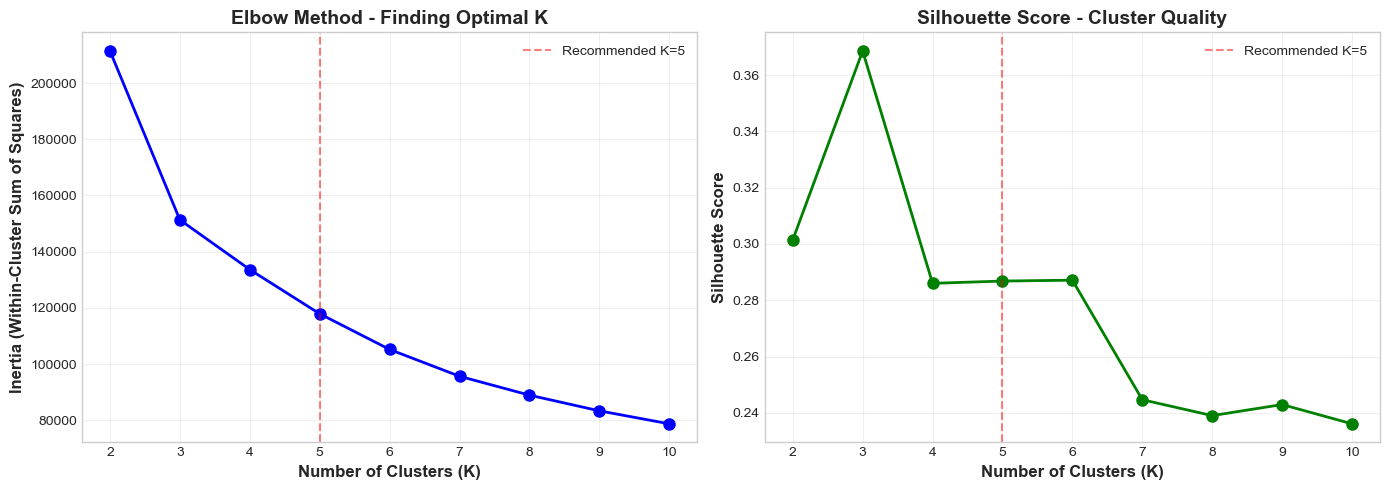


    Selected K = 5 clusters

 Training K-Means with K=5...
    Clustering complete!

 Cluster Distribution:
   Cluster 0: 2761 students (9.3%)
   Cluster 1: 3805 students (12.8%)
   Cluster 2: 14462 students (48.6%)
   Cluster 3: 8727 students (29.3%)
   Cluster 4: 11 students (0.0%)

 Characterizing each persona...

 PERSONA PROFILES:
 Cluster  Count  Avg_Score  Total_Clicks  Days_Active  Submissions  Pass_Rate
       0   2761  81.677204   6306.122782   181.927925    13.035857  86.671496
       1   3805   4.972311    140.106965     8.858870     0.424442   0.367937
       2  14462  71.320649    598.458789    45.828724     5.997926  46.003319
       3   8727  76.485487   2291.246820    99.676979     9.496963  72.373095
       4     11  69.346912   7301.181818   127.454545     8.181818  72.727273

 Naming personas based on behavior...
   Cluster 0:  The Star Performer
   Cluster 1:  The Ghost
   Cluster 2: The Disengaged
   Cluster 3:  The Solid Student
   Cluster 4:  The Struggler

 Cr

In [27]:

print("\n Preparing data for clustering...")

# Use the master dataset with all features
clustering_df = master_df.copy()

# Select features for clustering (behavioral + performance)
clustering_features = [
    'avg_score',
    'max_score', 
    'min_score',
    'submission_count',
    'total_clicks',
    'days_active',
    'avg_clicks_per_day',
    'max_clicks_single_day',
    'activity_sessions',
    'click_consistency'
]

# Check which features exist
available_clustering_features = [col for col in clustering_features if col in clustering_df.columns]

print(f"   Using {len(available_clustering_features)} features for clustering:")
for feat in available_clustering_features:
    print(f"      • {feat}")

# Create feature matrix
X_cluster = clustering_df[available_clustering_features].fillna(0)

# Remove any rows with all zeros (completely inactive students)
row_sums = X_cluster.sum(axis=1)
X_cluster = X_cluster[row_sums > 0]
clustering_df = clustering_df[row_sums > 0]

print(f"\n    Dataset ready: {len(X_cluster):,} students")

# Standardize features (CRITICAL for K-Means!)
print("\n Standardizing features...")

from sklearn.preprocessing import StandardScaler

scaler_cluster = StandardScaler()
X_scaled = scaler_cluster.fit_transform(X_cluster)

print("   Features standardized (mean=0, std=1)")

# Find optimal number of clusters using Elbow Method
print("\n Finding optimal number of clusters (Elbow Method)...")

from sklearn.cluster import KMeans

inertias = []
silhouette_scores = []
K_range = range(2, 11)

print("   Testing K from 2 to 10...")

from sklearn.metrics import silhouette_score

for k in K_range:
    kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_temp.fit(X_scaled)
    inertias.append(kmeans_temp.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans_temp.labels_))
    print(f"      K={k}: Inertia={kmeans_temp.inertia_:.2f}, Silhouette={silhouette_scores[-1]:.3f}")

# Plot Elbow curve
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Elbow plot
ax1 = axes[0]
ax1.plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
ax1.set_xlabel('Number of Clusters (K)', fontweight='bold', fontsize=12)
ax1.set_ylabel('Inertia (Within-Cluster Sum of Squares)', fontweight='bold', fontsize=12)
ax1.set_title('Elbow Method - Finding Optimal K', fontweight='bold', fontsize=14)
ax1.grid(alpha=0.3)
ax1.axvline(x=5, color='red', linestyle='--', alpha=0.5, label='Recommended K=5')
ax1.legend()

# Silhouette plot
ax2 = axes[1]
ax2.plot(K_range, silhouette_scores, 'go-', linewidth=2, markersize=8)
ax2.set_xlabel('Number of Clusters (K)', fontweight='bold', fontsize=12)
ax2.set_ylabel('Silhouette Score', fontweight='bold', fontsize=12)
ax2.set_title('Silhouette Score - Cluster Quality', fontweight='bold', fontsize=14)
ax2.grid(alpha=0.3)
ax2.axvline(x=5, color='red', linestyle='--', alpha=0.5, label='Recommended K=5')
ax2.legend()

plt.tight_layout()
plt.savefig('clustering_optimization.png', dpi=300, bbox_inches='tight')
print("\n    Saved: clustering_optimization.png")
plt.show()

# Choose optimal K (you can adjust this based on the elbow plot)
optimal_k = 5  # Default to 5, but you can change based on plots

print(f"\n    Selected K = {optimal_k} clusters")

# Train final K-Means model
print(f"\n Training K-Means with K={optimal_k}...")

kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans_final.fit_predict(X_scaled)

print(f"    Clustering complete!")

# Add cluster labels to dataframe
clustering_df['persona'] = cluster_labels

print(f"\n Cluster Distribution:")
cluster_counts = pd.Series(cluster_labels).value_counts().sort_index()
for cluster_id, count in cluster_counts.items():
    print(f"   Cluster {cluster_id}: {count} students ({count/len(cluster_labels)*100:.1f}%)")

# Analyze each cluster
print("\n Characterizing each persona...")

persona_profiles = []

for cluster_id in range(optimal_k):
    cluster_data = clustering_df[clustering_df['persona'] == cluster_id]
    
    profile = {
        'Cluster': cluster_id,
        'Count': len(cluster_data),
        'Avg_Score': cluster_data['avg_score'].mean() if 'avg_score' in cluster_data.columns else 0,
        'Total_Clicks': cluster_data['total_clicks'].mean() if 'total_clicks' in cluster_data.columns else 0,
        'Days_Active': cluster_data['days_active'].mean() if 'days_active' in cluster_data.columns else 0,
        'Submissions': cluster_data['submission_count'].mean() if 'submission_count' in cluster_data.columns else 0,
        'Pass_Rate': (cluster_data['target'].sum() / len(cluster_data) * 100) if 'target' in cluster_data.columns else 0
    }
    
    persona_profiles.append(profile)

persona_summary = pd.DataFrame(persona_profiles)

print("\n PERSONA PROFILES:")
print(persona_summary.to_string(index=False))

# Assign descriptive names based on characteristics (IMPROVED LOGIC)
print("\n Naming personas based on behavior...")

# Calculate percentiles for better thresholds
score_high = persona_summary['Avg_Score'].quantile(0.75)
score_low = persona_summary['Avg_Score'].quantile(0.25)
clicks_high = persona_summary['Total_Clicks'].quantile(0.75)
clicks_low = persona_summary['Total_Clicks'].quantile(0.25)
days_high = persona_summary['Days_Active'].quantile(0.75)
days_low = persona_summary['Days_Active'].quantile(0.25)

persona_names = {}
used_names = set()

for idx, row in persona_summary.iterrows():
    cluster_id = int(row['Cluster'])
    
    # Priority-based naming to ensure unique names
    name = None
    
    # 1. Check for Star Performers (high score + high engagement)
    if row['Avg_Score'] >= score_high and row['Total_Clicks'] >= clicks_high and " The Star Performer" not in used_names:
        name = " The Star Performer"
    
    # 2. Check for Efficient Learners (high score + low clicks)
    elif row['Avg_Score'] >= score_high and row['Total_Clicks'] < clicks_low and " The Efficient Learner" not in used_names:
        name = "The Efficient Learner"
    
    # 3. Check for Strugglers (high engagement but low scores)
    elif row['Total_Clicks'] >= clicks_high and row['Avg_Score'] <= score_low and " The Struggler" not in used_names:
        name = " The Struggler"
    
    # 4. Check for Ghosts (very low activity)
    elif row['Days_Active'] <= days_low and row['Total_Clicks'] <= clicks_low and " The Ghost" not in used_names:
        name = " The Ghost"
    
    # 5. Check for Disengaged (low clicks, any score)
    elif row['Total_Clicks'] <= clicks_low and "💤 The Disengaged" not in used_names:
        name = "The Disengaged"
    
    # 6. Check for Overachievers (very high engagement, good scores)
    elif row['Total_Clicks'] >= clicks_high and row['Avg_Score'] >= persona_summary['Avg_Score'].median() and " The Overachiever" not in used_names:
        name = " The Overachiever"
    
    # 7. Solid Student (moderate everything)
    elif row['Avg_Score'] >= persona_summary['Avg_Score'].median() and " The Solid Student" not in used_names:
        name = " The Solid Student"
    
    # 8. Inconsistent (if nothing else fits)
    elif " The Inconsistent" not in used_names:
        name = " The Inconsistent"
    
    # Fallback with cluster ID if somehow no name assigned
    if name is None or name in used_names:
        name = f" Student Group {cluster_id}"
    
    persona_names[cluster_id] = name
    used_names.add(name)
    print(f"   Cluster {cluster_id}: {name}")

# Add persona names to dataframe
clustering_df['persona_name'] = clustering_df['persona'].map(persona_names)

# Detailed persona descriptions
print("\n Creating detailed persona descriptions...")



for cluster_id in range(optimal_k):
    cluster_data = clustering_df[clustering_df['persona'] == cluster_id]
    

    print(f"Size: {len(cluster_data)} students ({len(cluster_data)/len(clustering_df)*100:.1f}%)")
    
    if 'avg_score' in cluster_data.columns:
        print(f" Average Score: {cluster_data['avg_score'].mean():.2f}/100")
    
    if 'target' in cluster_data.columns:
        pass_rate = (cluster_data['target'] == 1).sum() / len(cluster_data) * 100
        print(f" Pass Rate: {pass_rate:.1f}%")
    
    if 'total_clicks' in cluster_data.columns:
        print(f"  Average Clicks: {cluster_data['total_clicks'].mean():.0f}")
    
    if 'days_active' in cluster_data.columns:
        print(f" Average Active Days: {cluster_data['days_active'].mean():.1f}")
    
    if 'submission_count' in cluster_data.columns:
        print(f" Average Submissions: {cluster_data['submission_count'].mean():.1f}")
    
    # Behavioral insights
    print(f"\n Characteristics:")
    
    avg_score = cluster_data['avg_score'].mean() if 'avg_score' in cluster_data.columns else 0
    avg_clicks = cluster_data['total_clicks'].mean() if 'total_clicks' in cluster_data.columns else 0
    avg_days = cluster_data['days_active'].mean() if 'days_active' in cluster_data.columns else 0
    
    if avg_score > 75:
        print("   • High academic performance")
    elif avg_score < 50:
        print("   • Struggling academically")
    else:
        print("   • Moderate academic performance")
    
    if avg_clicks > persona_summary['Total_Clicks'].median():
        print("   • Highly engaged with course materials")
    elif avg_clicks < persona_summary['Total_Clicks'].quantile(0.25):
        print("   • Low engagement with platform")
    else:
        print("   • Moderate engagement")
    
    if avg_days > persona_summary['Days_Active'].median():
        print("   • Consistent participation")
    elif avg_days < persona_summary['Days_Active'].quantile(0.25):
        print("   • Sporadic or minimal participation")
    else:
        print("   • Regular participation")

# Save results
clustering_df.to_csv('Student_Personas.csv', index=False)
print("\n\n Saved: Student_Personas.csv")

# Save persona summary
persona_summary['Persona_Name'] = persona_summary['Cluster'].map(persona_names)
persona_summary.to_csv('Persona_Summary.csv', index=False)
print("Saved: Persona_Summary.csv")



 Preparing data for visualization...
   Using 10 features

 Applying PCA (reducing to 2D)...
    PCA complete!
   • PC1 explains 50.36% of variance
   • PC2 explains 19.21% of variance
   • Total explained: 69.57%

 Creating visualizations...

   Creating main PCA scatter plot...
   persona_pca_visualization.png


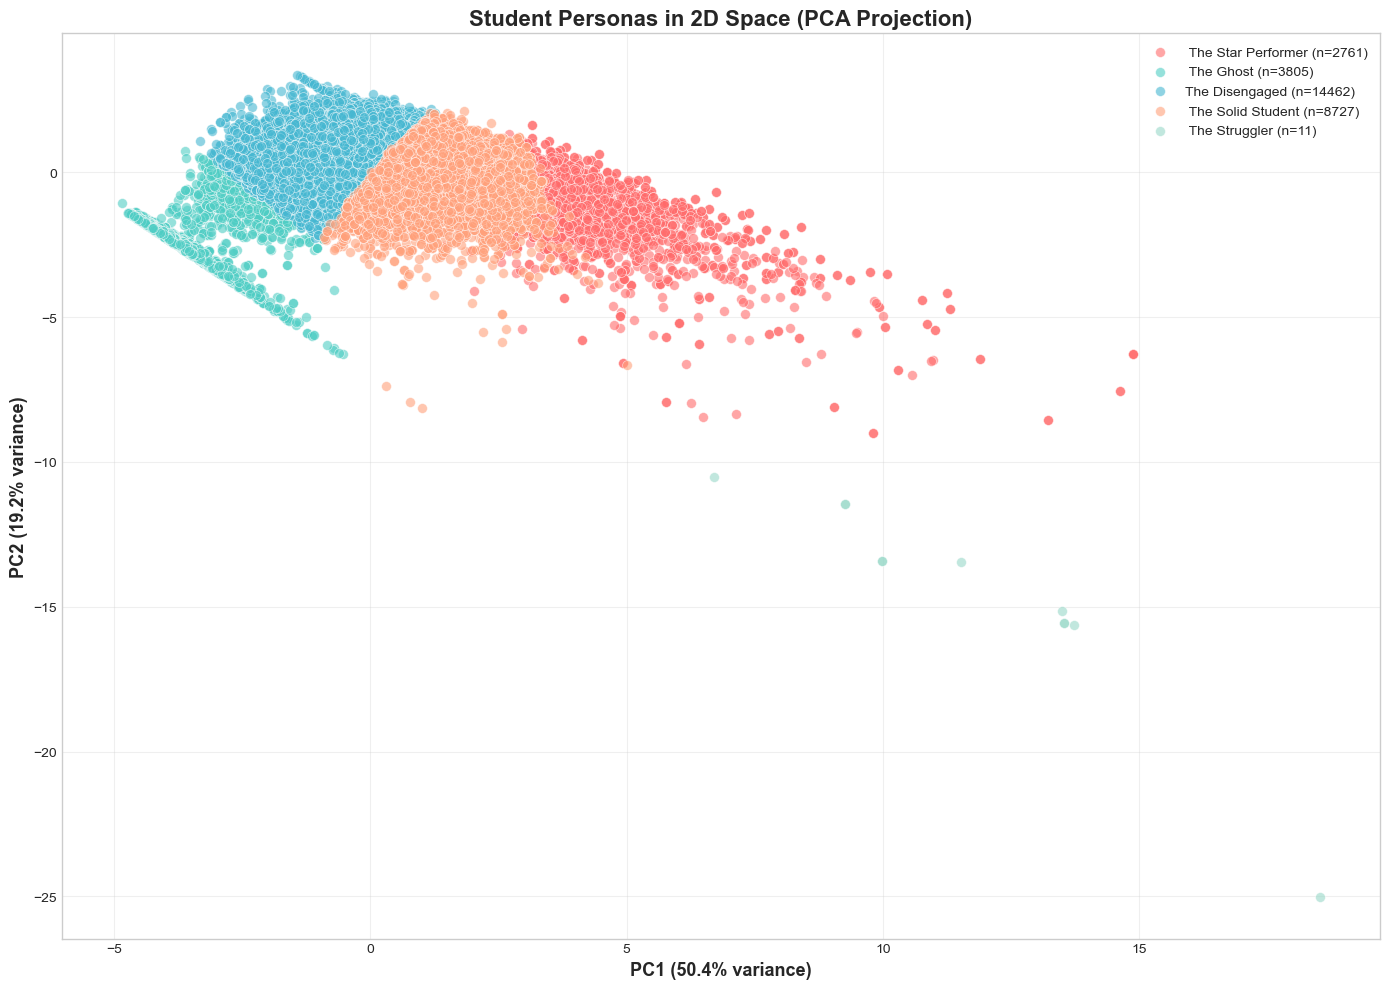


   Creating PCA plot with cluster centers...
   persona_pca_with_centers.png


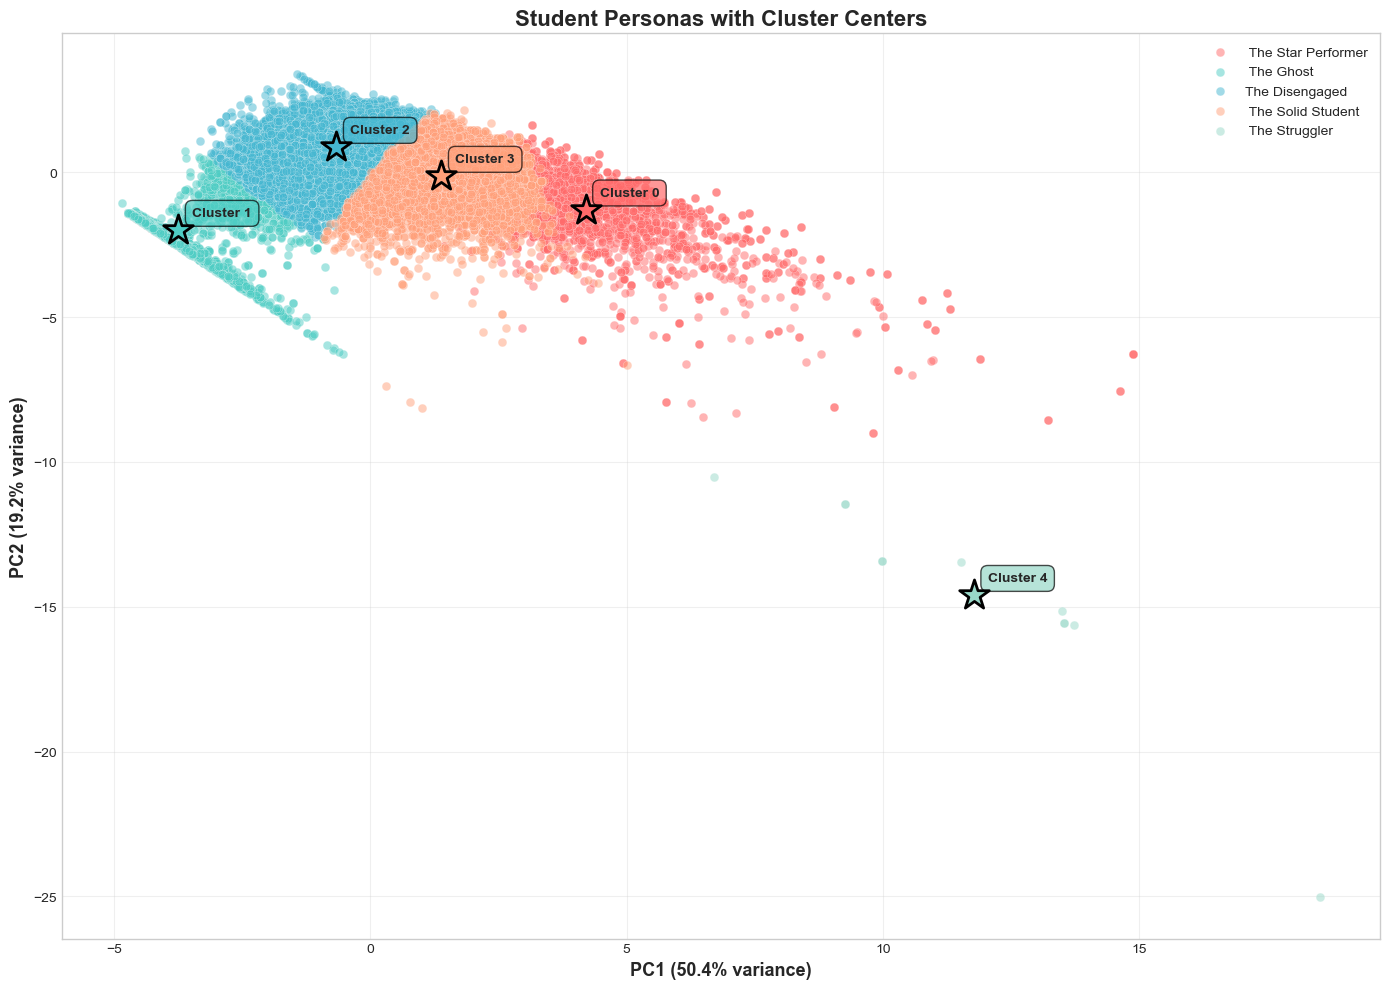


   Creating PCA feature contribution plot...
    pca_feature_contributions.png


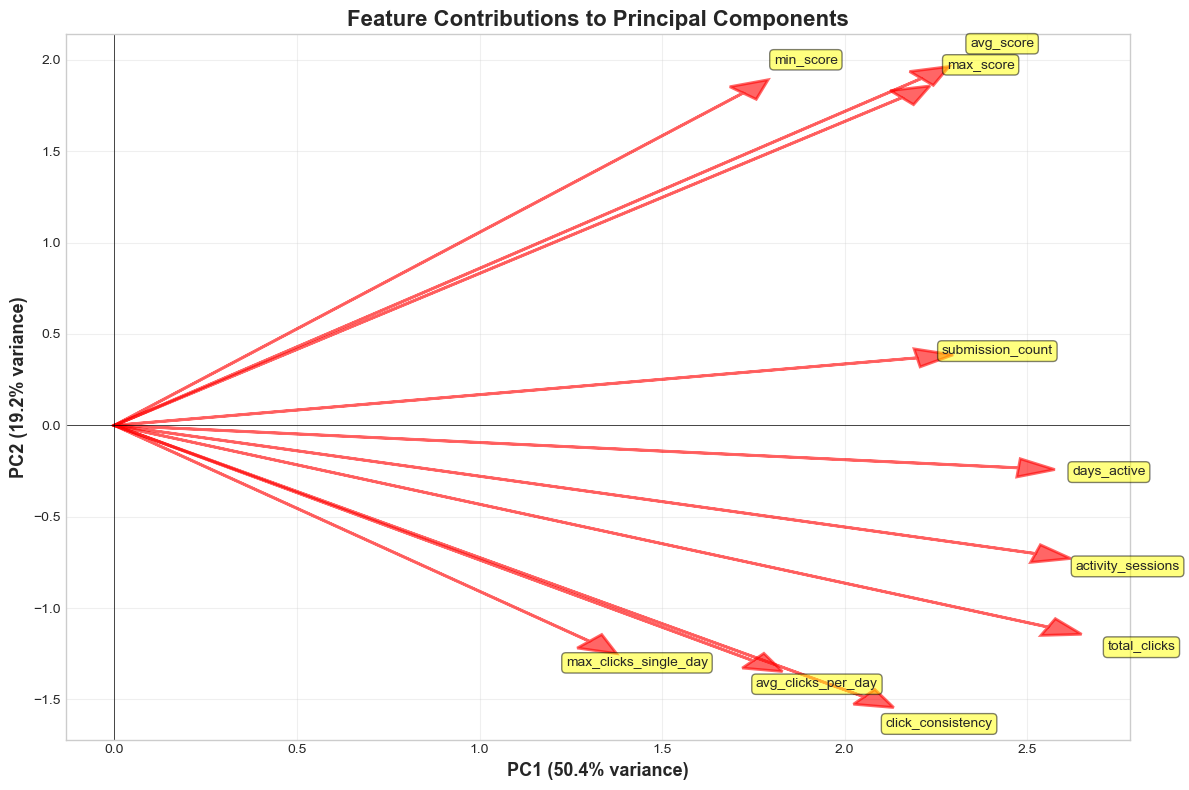


  Creating variance explanation plot...
   pca_variance_explained.png


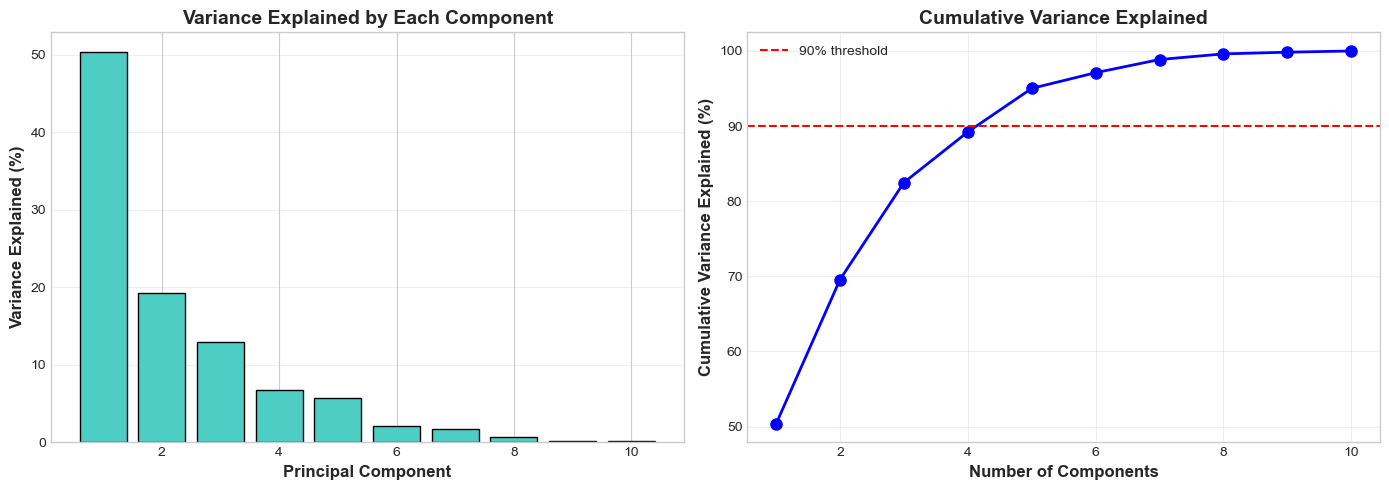


Interpreting principal components...

 PC1 - Top Contributing Features:
          Feature  PC1_Loading
     total_clicks     0.379788
activity_sessions     0.374649
      days_active     0.367752
        avg_score     0.328256
 submission_count     0.326502

 PC2 - Top Contributing Features:
           Feature  PC2_Loading
         avg_score     0.456585
         min_score     0.437385
         max_score     0.431308
 click_consistency    -0.357239
avg_clicks_per_day    -0.309692

 Saving results...
  Student_Personas_with_PCA.csv
 PCA_Feature_Contributions.csv

 PC1 (Horizontal Axis):
   • Explains 50.4% of variance
   • Strongest feature: total_clicks (0.380)
   • Interpretation: Engagement Level (left = low, right = high)

 PC2 (Vertical Axis):
   • Explains 19.2% of variance
   • Strongest feature: avg_score (0.457)
   • Interpretation: Performance Consistency (bottom = low, top = high)


In [28]:


# Load the clustering results
clustering_df = pd.read_csv('Student_Personas.csv')

print("\n Preparing data for visualization...")

# Recreate the feature matrix used for clustering
clustering_features = [
    'avg_score',
    'max_score', 
    'min_score',
    'submission_count',
    'total_clicks',
    'days_active',
    'avg_clicks_per_day',
    'max_clicks_single_day',
    'activity_sessions',
    'click_consistency'
]

available_features = [col for col in clustering_features if col in clustering_df.columns]
X_viz = clustering_df[available_features].fillna(0)

print(f"   Using {len(available_features)} features")

# Standardize features (same as clustering)
from sklearn.preprocessing import StandardScaler

scaler_viz = StandardScaler()
X_scaled_viz = scaler_viz.fit_transform(X_viz)

# Apply PCA
print("\n Applying PCA (reducing to 2D)...")

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled_viz)

print(f"    PCA complete!")
print(f"   • PC1 explains {pca.explained_variance_ratio_[0]*100:.2f}% of variance")
print(f"   • PC2 explains {pca.explained_variance_ratio_[1]*100:.2f}% of variance")
print(f"   • Total explained: {sum(pca.explained_variance_ratio_)*100:.2f}%")

# Add PCA coordinates to dataframe
clustering_df['PC1'] = X_pca[:, 0]
clustering_df['PC2'] = X_pca[:, 1]

# Create color map for personas
print("\n Creating visualizations...")

unique_personas = clustering_df['persona'].unique()
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8']
color_map = {persona: colors[i % len(colors)] for i, persona in enumerate(sorted(unique_personas))}


print("\n   Creating main PCA scatter plot...")

fig, ax = plt.subplots(figsize=(14, 10))

for persona in sorted(unique_personas):
    persona_data = clustering_df[clustering_df['persona'] == persona]
    persona_name = persona_data['persona_name'].iloc[0]
    
    ax.scatter(
        persona_data['PC1'], 
        persona_data['PC2'],
        c=color_map[persona],
        label=f"{persona_name} (n={len(persona_data)})",
        alpha=0.6,
        s=50,
        edgecolors='white',
        linewidth=0.5
    )

ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)', 
              fontweight='bold', fontsize=13)
ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)', 
              fontweight='bold', fontsize=13)
ax.set_title('Student Personas in 2D Space (PCA Projection)', 
             fontweight='bold', fontsize=16)
ax.legend(loc='best', fontsize=10, framealpha=0.9)
ax.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('persona_pca_visualization.png', dpi=300, bbox_inches='tight')
print("   persona_pca_visualization.png")
plt.show()

print("\n   Creating PCA plot with cluster centers...")

fig, ax = plt.subplots(figsize=(14, 10))

for persona in sorted(unique_personas):
    persona_data = clustering_df[clustering_df['persona'] == persona]
    persona_name = persona_data['persona_name'].iloc[0]
    
    # Plot points
    ax.scatter(
        persona_data['PC1'], 
        persona_data['PC2'],
        c=color_map[persona],
        label=persona_name,
        alpha=0.5,
        s=40,
        edgecolors='white',
        linewidth=0.3
    )
    
    # Plot cluster center
    center_pc1 = persona_data['PC1'].mean()
    center_pc2 = persona_data['PC2'].mean()
    
    ax.scatter(
        center_pc1,
        center_pc2,
        c=color_map[persona],
        s=500,
        marker='*',
        edgecolors='black',
        linewidth=2,
        zorder=10
    )
    
    # Add label near center
    ax.annotate(
        f'Cluster {persona}',
        xy=(center_pc1, center_pc2),
        xytext=(10, 10),
        textcoords='offset points',
        fontsize=10,
        fontweight='bold',
        bbox=dict(boxstyle='round,pad=0.5', facecolor=color_map[persona], alpha=0.7)
    )

ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)', 
              fontweight='bold', fontsize=13)
ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)', 
              fontweight='bold', fontsize=13)
ax.set_title('Student Personas with Cluster Centers', 
             fontweight='bold', fontsize=16)
ax.legend(loc='best', fontsize=10, framealpha=0.9)
ax.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('persona_pca_with_centers.png', dpi=300, bbox_inches='tight')
print("   persona_pca_with_centers.png")
plt.show()

print("\n   Creating PCA feature contribution plot...")

# Get the loadings (how each feature contributes to each PC)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

fig, ax = plt.subplots(figsize=(12, 8))

# Create biplot
for i, feature in enumerate(available_features):
    ax.arrow(0, 0, loadings[i, 0]*3, loadings[i, 1]*3, 
             head_width=0.1, head_length=0.1, 
             fc='red', ec='red', alpha=0.6, linewidth=2)
    
    ax.text(loadings[i, 0]*3.3, loadings[i, 1]*3.3, 
            feature, fontsize=10, ha='center', va='center',
            bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.5))

ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)', 
              fontweight='bold', fontsize=13)
ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)', 
              fontweight='bold', fontsize=13)
ax.set_title('Feature Contributions to Principal Components', 
             fontweight='bold', fontsize=16)
ax.grid(alpha=0.3)
ax.axhline(y=0, color='k', linewidth=0.5)
ax.axvline(x=0, color='k', linewidth=0.5)

plt.tight_layout()
plt.savefig('pca_feature_contributions.png', dpi=300, bbox_inches='tight')
print("    pca_feature_contributions.png")
plt.show()

print("\n  Creating variance explanation plot...")

# Calculate explained variance for more components
pca_full = PCA()
pca_full.fit(X_scaled_viz)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Individual variance
ax1 = axes[0]
ax1.bar(range(1, len(pca_full.explained_variance_ratio_) + 1), 
        pca_full.explained_variance_ratio_ * 100,
        color='#4ECDC4', edgecolor='black')
ax1.set_xlabel('Principal Component', fontweight='bold', fontsize=12)
ax1.set_ylabel('Variance Explained (%)', fontweight='bold', fontsize=12)
ax1.set_title('Variance Explained by Each Component', fontweight='bold', fontsize=14)
ax1.grid(axis='y', alpha=0.3)

# Cumulative variance
ax2 = axes[1]
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_) * 100
ax2.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 
         'bo-', linewidth=2, markersize=8)
ax2.axhline(y=90, color='red', linestyle='--', label='90% threshold')
ax2.set_xlabel('Number of Components', fontweight='bold', fontsize=12)
ax2.set_ylabel('Cumulative Variance Explained (%)', fontweight='bold', fontsize=12)
ax2.set_title('Cumulative Variance Explained', fontweight='bold', fontsize=14)
ax2.legend()
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('pca_variance_explained.png', dpi=300, bbox_inches='tight')
print("   pca_variance_explained.png")
plt.show()

print("\nInterpreting principal components...")

# Get feature loadings for PC1 and PC2
pc1_loadings = pd.DataFrame({
    'Feature': available_features,
    'PC1_Loading': pca.components_[0]
}).sort_values('PC1_Loading', key=abs, ascending=False)

pc2_loadings = pd.DataFrame({
    'Feature': available_features,
    'PC2_Loading': pca.components_[1]
}).sort_values('PC2_Loading', key=abs, ascending=False)

print("\n PC1 - Top Contributing Features:")
print(pc1_loadings.head().to_string(index=False))

print("\n PC2 - Top Contributing Features:")
print(pc2_loadings.head().to_string(index=False))

# Save PCA results
print("\n Saving results...")

clustering_df.to_csv('Student_Personas_with_PCA.csv', index=False)
print("  Student_Personas_with_PCA.csv")

# Save PCA interpretation
pca_interpretation = pd.DataFrame({
    'Feature': available_features,
    'PC1_Contribution': pca.components_[0],
    'PC2_Contribution': pca.components_[1]
})
pca_interpretation.to_csv('PCA_Feature_Contributions.csv', index=False)
print(" PCA_Feature_Contributions.csv")



top_pc1 = pc1_loadings.iloc[0]
top_pc2 = pc2_loadings.iloc[0]

print(f"\n PC1 (Horizontal Axis):")
print(f"   • Explains {pca.explained_variance_ratio_[0]*100:.1f}% of variance")
print(f"   • Strongest feature: {top_pc1['Feature']} ({top_pc1['PC1_Loading']:.3f})")
if 'total_clicks' in top_pc1['Feature'] or 'activity' in top_pc1['Feature']:
    print(f"   • Interpretation: Engagement Level (left = low, right = high)")
elif 'score' in top_pc1['Feature']:
    print(f"   • Interpretation: Academic Performance (left = low, right = high)")

print(f"\n PC2 (Vertical Axis):")
print(f"   • Explains {pca.explained_variance_ratio_[1]*100:.1f}% of variance")
print(f"   • Strongest feature: {top_pc2['Feature']} ({top_pc2['PC2_Loading']:.3f})")
if 'total_clicks' in top_pc2['Feature'] or 'activity' in top_pc2['Feature']:
    print(f"   • Interpretation: Engagement Pattern (bottom = low, top = high)")
elif 'score' in top_pc2['Feature']:
    print(f"   • Interpretation: Performance Consistency (bottom = low, top = high)")



 Loading all analysis results...
    Binge Learning: 29,741 students
    Comeback Stories: 22,992 students
    Student Personas: 29,766 students

 Analyzing Learning Style × Persona interactions...

 Learning Style × Persona Distribution:
persona_name     The Ghost   The Solid Student   The Star Performer  \
learning_style                                                        
Binge Learner         1394               11622                 4120   
Moderate              1338                 126                    5   
Steady Learner        1880                   7                    0   
Total                 4612               11755                 4125   

persona_name     The Struggler  The Disengaged  Total  
learning_style                                         
Binge Learner               17           14452  31605  
Moderate                     0            2155   3624  
Steady Learner               0             533   2420  
Total                       17           17140  37649

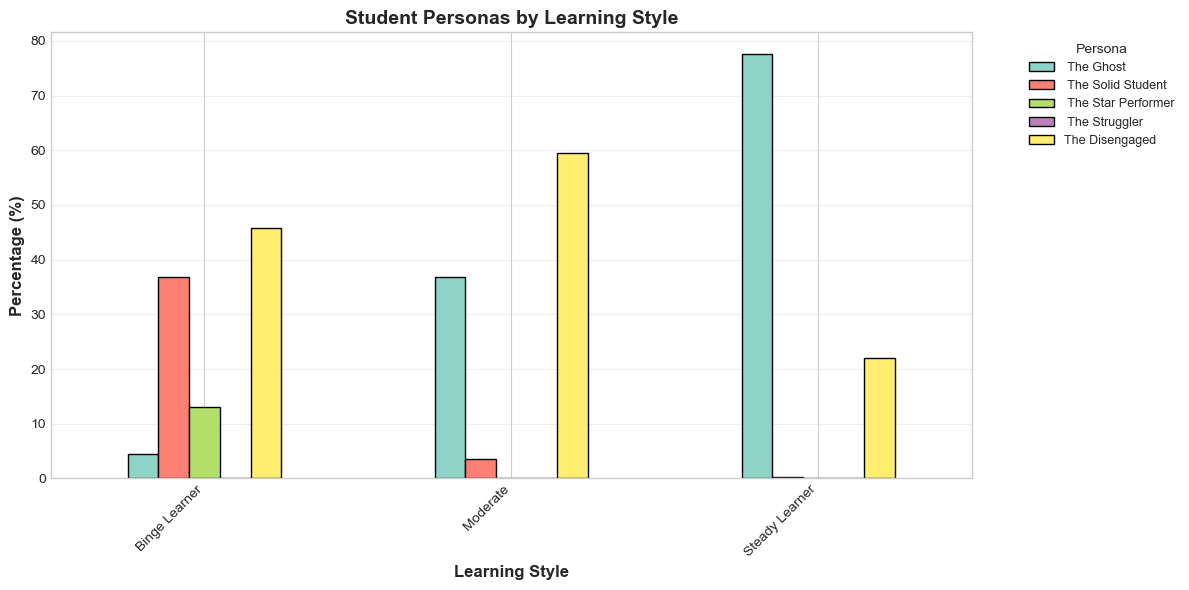


 Analyzing Comeback Status × Persona interactions...

 Comeback Status × Persona Distribution:
persona_name      The Ghost   The Solid Student   The Star Performer  \
comeback_status                                                        
Burnout                   0                1169                  245   
Comeback Kid              7                 779                  100   
Consistent Star           0                5828                 2888   
Stable                   46                3071                  793   
Struggler               219                 598                   94   
Total                   272               11445                 4120   

persona_name      The Struggler  The Disengaged  Total  
comeback_status                                         
Burnout                       5            2007   3426  
Comeback Kid                  1            1065   1952  
Consistent Star               2            4871  13589  
Stable                        9           

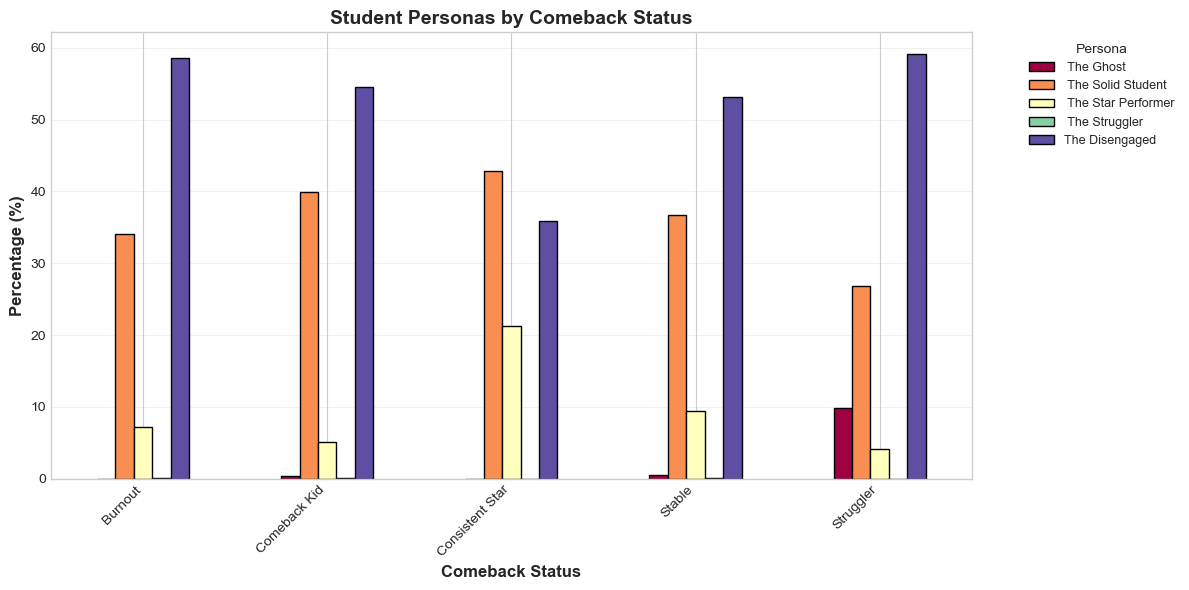


 Analyzing Learning Style × Comeback interactions...

 Learning Style × Comeback Status:
comeback_status  Burnout  Comeback Kid  Consistent Star  Stable  Struggler  \
learning_style                                                               
Binge Learner       3227          1828            13023    7847       2030   
Moderate             164           105              503     428        167   
Steady Learner        30            19               61      76         35   
Total               3421          1952            13587    8351       2232   

comeback_status  Total  
learning_style          
Binge Learner    27955  
Moderate          1367  
Steady Learner     221  
Total            29543  

 Comeback Rate by Learning Style:
   Binge Learner: 6.5%
   Moderate: 7.7%
   Steady Learner: 8.6%

 Average Score Improvement by Learning Style:
   Binge Learner: -1.75 points
   Moderate: +0.27 points
   Steady Learner: -1.00 points

    learning_style_x_comeback.png


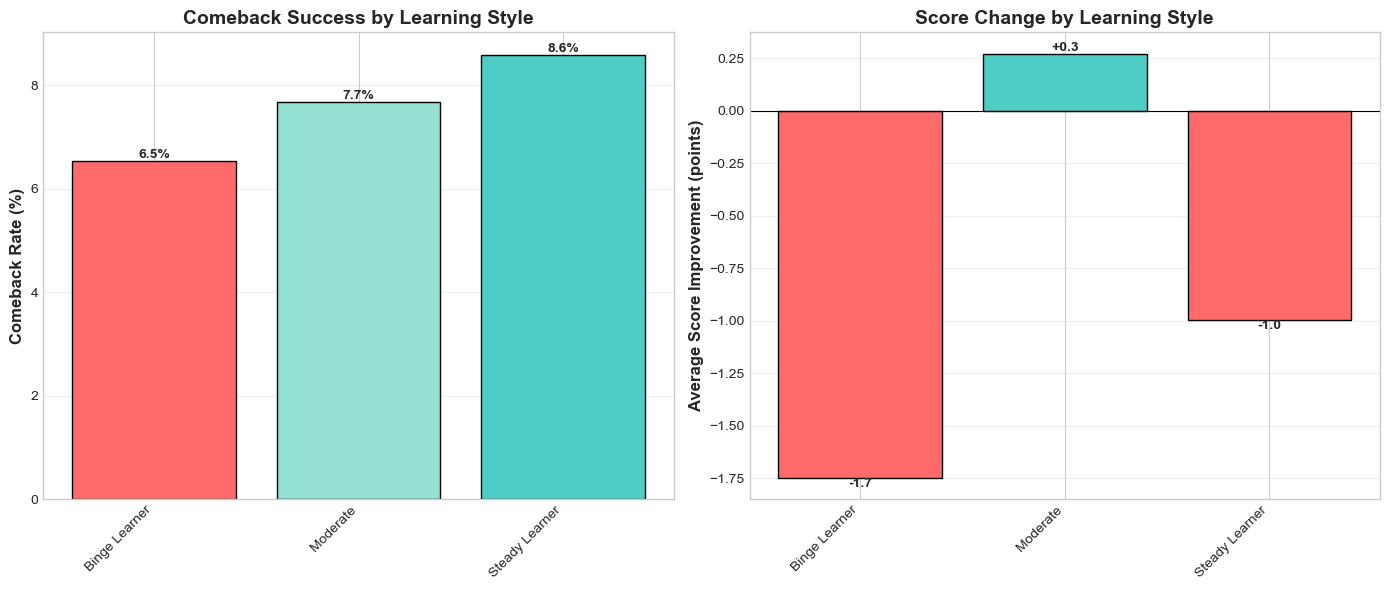


 Creating comprehensive student profiles...

   Created comprehensive profile for 52,400 students
   Comprehensive_Student_Profiles.csv

 Generating integrated insights...

 INSIGHT 1: Most Common Student Profile
   • Persona: The Disengaged
   • Learning Style: Binge Learner
   • Count: 19084 students (36.4%)

 INSIGHT 2: Which Personas Make Comebacks?
   Top 3 Comeback Personas:
   1. The Disengaged: 1065 students (54.6% of all comebacks)
   2.  The Solid Student: 779 students (39.9% of all comebacks)
   3.  The Star Performer: 100 students (5.1% of all comebacks)

 INSIGHT 3: Learning Style Performance Ranking
   1. Binge Learner: 71.92 average score
   2. Moderate: 46.92 average score
   3. Steady Learner: 17.44 average score

 INSIGHT 4: Students Needing Intervention
   • Found 8467 high-risk students
   • Profile: Binge learners who are struggling/burning out
   • Recommendation: Early intervention with study skills support

 INSIGHT 5: Formula for Success
   • Steady learners p

In [29]:


print("\n Loading all analysis results...")

# Load all the datasets
binge_df = pd.read_csv('Binge_Learning_Analysis.csv')
comeback_df = pd.read_csv('Comeback_Analysis.csv')
persona_df = pd.read_csv('Student_Personas_with_PCA.csv')

print(f"    Binge Learning: {len(binge_df):,} students")
print(f"    Comeback Stories: {len(comeback_df):,} students")
print(f"    Student Personas: {len(persona_df):,} students")

print("\n Analyzing Learning Style × Persona interactions...")

# Merge binge and persona data
merged_binge_persona = binge_df[['id_student', 'learning_style']].merge(
    persona_df[['id_student', 'persona_name']], 
    on='id_student', 
    how='inner'
)

if len(merged_binge_persona) > 0:
    # Create crosstab
    style_persona_crosstab = pd.crosstab(
        merged_binge_persona['learning_style'],
        merged_binge_persona['persona_name'],
        margins=True,
        margins_name='Total'
    )
    
    print("\n Learning Style × Persona Distribution:")
    print(style_persona_crosstab)
    
    # Percentage breakdown
    style_persona_pct = pd.crosstab(
        merged_binge_persona['learning_style'],
        merged_binge_persona['persona_name'],
        normalize='index'
    ) * 100
    
    print("\n Percentage within each Learning Style:")
    print(style_persona_pct.round(1))
    
    # Visualize the relationship
    fig, ax = plt.subplots(figsize=(12, 6))
    style_persona_pct.plot(kind='bar', ax=ax, colormap='Set3', edgecolor='black')
    ax.set_xlabel('Learning Style', fontweight='bold', fontsize=12)
    ax.set_ylabel('Percentage (%)', fontweight='bold', fontsize=12)
    ax.set_title('Student Personas by Learning Style', fontweight='bold', fontsize=14)
    ax.legend(title='Persona', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
    ax.grid(axis='y', alpha=0.3)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig('learning_style_x_persona.png', dpi=300, bbox_inches='tight')
    print("\n  learning_style_x_persona.png")
    plt.show()


print("\n Analyzing Comeback Status × Persona interactions...")

# Merge comeback and persona data
merged_comeback_persona = comeback_df[['id_student', 'comeback_status']].merge(
    persona_df[['id_student', 'persona_name']], 
    on='id_student', 
    how='inner'
)

if len(merged_comeback_persona) > 0:
    # Create crosstab
    comeback_persona_crosstab = pd.crosstab(
        merged_comeback_persona['comeback_status'],
        merged_comeback_persona['persona_name'],
        margins=True,
        margins_name='Total'
    )
    
    print("\n Comeback Status × Persona Distribution:")
    print(comeback_persona_crosstab)
    
    # Percentage breakdown
    comeback_persona_pct = pd.crosstab(
        merged_comeback_persona['comeback_status'],
        merged_comeback_persona['persona_name'],
        normalize='index'
    ) * 100
    
    print("\n Percentage within each Comeback Status:")
    print(comeback_persona_pct.round(1))
    
    # Visualize
    fig, ax = plt.subplots(figsize=(12, 6))
    comeback_persona_pct.plot(kind='bar', ax=ax, colormap='Spectral', edgecolor='black')
    ax.set_xlabel('Comeback Status', fontweight='bold', fontsize=12)
    ax.set_ylabel('Percentage (%)', fontweight='bold', fontsize=12)
    ax.set_title('Student Personas by Comeback Status', fontweight='bold', fontsize=14)
    ax.legend(title='Persona', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
    ax.grid(axis='y', alpha=0.3)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig('comeback_status_x_persona.png', dpi=300, bbox_inches='tight')
    print("\n    comeback_status_x_persona.png")
    plt.show()

print("\n Analyzing Learning Style × Comeback interactions...")

# Merge binge and comeback data
merged_binge_comeback = binge_df[['id_student', 'learning_style']].merge(
    comeback_df[['id_student', 'comeback_status', 'improvement']], 
    on='id_student', 
    how='inner'
)

if len(merged_binge_comeback) > 0:
    # Create crosstab
    style_comeback_crosstab = pd.crosstab(
        merged_binge_comeback['learning_style'],
        merged_binge_comeback['comeback_status'],
        margins=True,
        margins_name='Total'
    )
    
    print("\n Learning Style × Comeback Status:")
    print(style_comeback_crosstab)
    
    # Key question: Do binge learners have better comebacks?
    comeback_kids_by_style = merged_binge_comeback[
        merged_binge_comeback['comeback_status'] == 'Comeback Kid'
    ].groupby('learning_style').size()
    
    total_by_style = merged_binge_comeback.groupby('learning_style').size()
    
    comeback_rate_by_style = (comeback_kids_by_style / total_by_style * 100).fillna(0)
    
    print("\n Comeback Rate by Learning Style:")
    for style, rate in comeback_rate_by_style.items():
        print(f"   {style}: {rate:.1f}%")
    
    # Average improvement by learning style
    avg_improvement = merged_binge_comeback.groupby('learning_style')['improvement'].mean()
    
    print("\n Average Score Improvement by Learning Style:")
    for style, improvement in avg_improvement.items():
        print(f"   {style}: {improvement:+.2f} points")
    
    # Visualize
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    # Comeback rate
    ax1 = axes[0]
    bars = ax1.bar(comeback_rate_by_style.index, comeback_rate_by_style.values, 
                   color=['#ff6b6b', '#95e1d3', '#4ecdc4'], edgecolor='black')
    ax1.set_ylabel('Comeback Rate (%)', fontweight='bold', fontsize=12)
    ax1.set_title('Comeback Success by Learning Style', fontweight='bold', fontsize=14)
    ax1.grid(axis='y', alpha=0.3)
    plt.sca(ax1)
    plt.xticks(rotation=45, ha='right')
    
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}%',
                ha='center', va='bottom', fontweight='bold')
    
    # Average improvement
    ax2 = axes[1]
    colors_improvement = ['#ff6b6b' if x < 0 else '#4ecdc4' for x in avg_improvement.values]
    bars = ax2.bar(avg_improvement.index, avg_improvement.values, 
                   color=colors_improvement, edgecolor='black')
    ax2.set_ylabel('Average Score Improvement (points)', fontweight='bold', fontsize=12)
    ax2.set_title('Score Change by Learning Style', fontweight='bold', fontsize=14)
    ax2.axhline(y=0, color='black', linewidth=0.8)
    ax2.grid(axis='y', alpha=0.3)
    plt.sca(ax2)
    plt.xticks(rotation=45, ha='right')
    
    for bar, val in zip(bars, avg_improvement.values):
        height = bar.get_height()
        va = 'bottom' if height >= 0 else 'top'
        ax2.text(bar.get_x() + bar.get_width()/2., height,
                f'{val:+.1f}',
                ha='center', va=va, fontweight='bold')
    
    plt.tight_layout()
    plt.savefig('learning_style_x_comeback.png', dpi=300, bbox_inches='tight')
    print("\n    learning_style_x_comeback.png")
    plt.show()

print("\n Creating comprehensive student profiles...")

# Merge all three datasets
comprehensive_df = persona_df[['id_student', 'persona_name', 'persona']].copy()

# Add binge learning style
comprehensive_df = comprehensive_df.merge(
    binge_df[['id_student', 'learning_style', 'binge_ratio', 'cv_clicks']], 
    on='id_student', 
    how='left'
)

# Add comeback status
comprehensive_df = comprehensive_df.merge(
    comeback_df[['id_student', 'comeback_status', 'early_score', 'late_score', 'improvement']], 
    on='id_student', 
    how='left'
)

# Fill NaN values
comprehensive_df['learning_style'] = comprehensive_df['learning_style'].fillna('Unknown')
comprehensive_df['comeback_status'] = comprehensive_df['comeback_status'].fillna('No Data')

print(f"\n   Created comprehensive profile for {len(comprehensive_df):,} students")

# Save comprehensive dataset
comprehensive_df.to_csv('Comprehensive_Student_Profiles.csv', index=False)
print("   Comprehensive_Student_Profiles.csv")

print("\n Generating integrated insights...")

# Insight 1: Most common student profile
if len(comprehensive_df) > 0:
    most_common_profile = comprehensive_df.groupby(['persona_name', 'learning_style']).size().sort_values(ascending=False).head(1)
    
    print("\n INSIGHT 1: Most Common Student Profile")
    if len(most_common_profile) > 0:
        profile_info = most_common_profile.index[0]
        count = most_common_profile.values[0]
        print(f"   • Persona: {profile_info[0]}")
        print(f"   • Learning Style: {profile_info[1]}")
        print(f"   • Count: {count} students ({count/len(comprehensive_df)*100:.1f}%)")

# Insight 2: Which personas are most likely to comeback?
if len(merged_comeback_persona) > 0:
    comeback_kids = merged_comeback_persona[merged_comeback_persona['comeback_status'] == 'Comeback Kid']
    if len(comeback_kids) > 0:
        comeback_persona_dist = comeback_kids['persona_name'].value_counts()
        
        print("\n INSIGHT 2: Which Personas Make Comebacks?")
        print(f"   Top 3 Comeback Personas:")
        for i, (persona, count) in enumerate(comeback_persona_dist.head(3).items(), 1):
            pct = count / len(comeback_kids) * 100
            print(f"   {i}. {persona}: {count} students ({pct:.1f}% of all comebacks)")

# Insight 3: Learning style effectiveness across personas
if len(merged_binge_persona) > 0 and 'avg_score' in binge_df.columns:
    style_scores = binge_df.groupby('learning_style')['avg_score'].mean().sort_values(ascending=False)
    
    print("\n INSIGHT 3: Learning Style Performance Ranking")
    for rank, (style, score) in enumerate(style_scores.items(), 1):
        print(f"   {rank}. {style}: {score:.2f} average score")

# Insight 4: High-risk, high-potential students
if len(comprehensive_df) > 0:
    # Students who are disengaged but have potential
    if 'learning_style' in comprehensive_df.columns and 'persona_name' in comprehensive_df.columns:
        high_risk = comprehensive_df[
            (comprehensive_df['learning_style'] == 'Binge Learner') & 
            (comprehensive_df['comeback_status'].isin(['Struggler', 'Burnout']))
        ]
        
        if len(high_risk) > 0:
            print("\n INSIGHT 4: Students Needing Intervention")
            print(f"   • Found {len(high_risk)} high-risk students")
            print(f"   • Profile: Binge learners who are struggling/burning out")
            print(f"   • Recommendation: Early intervention with study skills support")

# Insight 5: Success pattern
print("\n INSIGHT 5: Formula for Success")
if len(binge_df) > 0 and 'learning_style' in binge_df.columns and 'target' in binge_df.columns:
    steady_success = binge_df[
        (binge_df['learning_style'] == 'Steady Learner') & 
        (binge_df['target'] == 1)
    ]
    
    if len(steady_success) > 0:
        steady_pass_rate = len(steady_success) / len(binge_df[binge_df['learning_style'] == 'Steady Learner']) * 100
        print(f"   • Steady learners pass rate: {steady_pass_rate:.1f}%")
        print(f"   • Key factors: Consistent engagement + regular study sessions")
        print(f"   • Takeaway: Consistency beats cramming!")



print(f"\n Dataset Coverage:")
print(f"   • Total unique students analyzed: {comprehensive_df['id_student'].nunique():,}")
print(f"   • Students with binge analysis: {len(binge_df):,}")
print(f"   • Students with comeback tracking: {len(comeback_df):,}")
print(f"   • Students with persona assignment: {len(persona_df):,}")

if 'learning_style' in comprehensive_df.columns:
    print(f"\n Learning Style Distribution:")
    for style, count in comprehensive_df['learning_style'].value_counts().items():
        pct = count / len(comprehensive_df) * 100
        print(f"   • {style}: {count:,} ({pct:.1f}%)")

if 'persona_name' in comprehensive_df.columns:
    print(f"\nPersona Distribution:")
    for persona, count in comprehensive_df['persona_name'].value_counts().head(5).items():
        pct = count / len(comprehensive_df) * 100
        print(f"   • {persona}: {count:,} ({pct:.1f}%)")

